## GROUP 18
## EXPLORATORY DATA ANALYSIS

#*Michael Lee, Micah Nickerson, Daniel Olal*


In [1]:
import numpy as np
import pandas as pd

# Plotting Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)


import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

from pandas.plotting import scatter_matrix

#hide plotting warnings
#import warnings
#warnings.filterwarnings("ignore")

In [2]:
# read the file
filepath = "data"
house_dataset = "/house_2018_demographics_by_district_with_votes.xlsx"
house_file = filepath+house_dataset

#senate_dataset = "2018_Election_Results_Senate/senate_2018_demographics_with_votes.csv"
#senate_file = filepath+senate_dataset

house_df = pd.read_excel(house_file)
#senate_df = pd.read_csv(senate_file)

house_df = house_df.drop(['Unnamed: 0'], axis=1) #drop Label Column
#senate_df = senate_df.drop(['Unnamed: 0'], axis=1) #drop Label Column

house_column_index = house_df.iloc[0:3] #extract header for easy access
#senate_column_index = senate_df.iloc[0:3] #extract header for easy access


# DROP DELAWARE - HAS MISSINGNESS
house_df = house_df.drop([89]) #bye Delaware

# DROP FLORIDA DISTRICTS THAT DID NOT VOTE IN 2018  (set rows 101,105,112,115)
house_df = house_df.drop([98,102,109,112]) # FL CDs 10,14,21,24

house_df = house_df.drop([0,1,2]) #drop head of dataset, header rows already extracted
#senate_df = senate_df.drop([0,1,2]) #drop head of dataset, header rows already extracted


#house_df.isnull().any()

print("House - By Congressional District - Database Dimensions: (%s,%s)" % house_df.shape)
#print("Senate - By State - Database Dimensions: (%s,%s)" % senate_df.shape)

display(house_column_index.head())
display(house_df.head())

display(house_df.tail())

House - By Congressional District - Database Dimensions: (430,601)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600
0,Year,State,District,Election,Election,Election,Election,Election,Election,Registration,People,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Election Year,State Code,District Number,Voting,Voting,Voting,Voting,Voting,Voting,Voting Registration,Voting Registration,Total_Estimated_eligibile,Not_Hispanic_Latino_CVAP,Am_Indian_AK_Native_CVAP,Asian_Alone_CVAP,African_American_Alone_CVAP,HI_Native_Pacific_Isl_Alone_CVAP,White_Alone_CVAP,Am_Indian_AK_Native_White_CVAP,Asian_White_CVAP,African_American_White_CVAP,Am_Indian_AK_Native_African_American_CVAP,Multiple_Race_CVAP,Hispanic_Latino_CVAP,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Race,Race,Race,Race,Race,Race,Race,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Election Year,State Abbreviation,Congressional District Number,democrat_vote,republican_vote,other_vote,totalvotes,percent_registered_who_voted,percent_eligible_who_voted,registered_voters,percent_eligible_who_actually_register,Total_CVAP,Not_Hispanic_Latino_CVAP,Am_Indian_AK_Native_CVAP,Asian_Alone_CVAP,African_American_Alone_CVAP,HI_Native_Pacific_Isl_Alone_CVAP,White_Alone_CVAP,Am_Indian_AK_Native_White_CVAP,Asian_White_CVAP,African_American_White_CVAP,Am_Indian_AK_Native_African_American_CVAP,Multiple_Race_CVAP,Hispanic_Latino_CVAP,18 years and over,Total population,Male,Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Median age (years),65 years and over,Total population,One race,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,...,United Zion Church,Vicariate for the Palestinian/Jordanian Orthod...,Vineyard USA,Wesleyan Church,Wisconsin Evangelical Lutheran Synod,Zoroastrian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600
3,2018,AL,1,89226,153228,163,242617,0.47902,0.457212,506486,0.954472,530645,519675,5430,5240,140210,110,362700,2985,950,1125,465,460,10970,552917,715346,344543,370803,40891,38836,52357,49123,42514,89384,85553,91122,51510,46973,75805,38651,12627,40.3,127083,715346,702333,479949,196891,6992,10627,183,...,0,0,0,310,117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,AL,2,86931,138879,420,226230,0.422534,0.439107,535413,1.03922,515205,505405,2050,3240,155665,55,338325,2860,1115,980,445,670,9800,524810,678122,326346,351776,42217,39603,44011,43990,46469,89934,81055,86722,45788,42971,67493,35146,12723,38.8,115362,678122,663115,426674,217977,2838,7442,26,...,0,0,247,146,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,AL,3,83996,147770,149,231915,0.491539,0.433543,471814,0.882011,534930,525745,1485,4015,134995,100,380005,2510,680,1200,310,450,9185,554393,708409,345941,362468,40153,42841,46658,48023,53788,89779,83351,91677,46240,46380,74314,35024,10181,39.2,119519,708409,695576,490987,183949,1300,13049,0,...,0,0,24,39,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,AL,4,46492,184255,222,230969,0.410866,0.453494,562151,1.10375,509310,499510,3670,2060,35730,180,451715,4595,315,670,245,325,9800,530790,686297,336349,349948,42358,39902,48055,43135,41383,80162,81963,87644,45752,47800,74931,39880,13332,40.5,128143,686297,670732,591084,51171,4391,3072,677,...,0,0,399,474,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,AL,5,101388,159063,222,260673,0.508846,0.487185,512283,0.957431,535060,522840,3490,6505,92085,370,411615,4560,1235,1445,620,915,12220,567616,725634,359028,366606,40325,44782,44853,48079,44893,97027,89853,96120,55636,44341,69559,37499,12667,39.5,119725,725634,706273,539903,130913,3123,12215,160,...,0,0,104,0,147,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600
433,2018,WI,5,138385,225619,284,364288,0.82952,0.662516,439155,0.798674,549855,530520,1295,8140,10720,195,504860,2030,1410,1195,90,590,19330,576328,731341,358554,372787,40947,41314,45113,45904,41059,90218,93036,93874,51868,55506,73422,41042,18038,41.3,132502,731341,717464,659846,21218,2076,24913,158,...,0,0,28,307,44496,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434,2018,WI,6,144536,180311,218,325065,0.804804,0.594008,403906,0.738078,547240,534245,2470,8100,8780,125,510375,1910,855,1050,150,430,12990,565783,714886,361506,353380,37751,41286,43372,44003,44723,84724,84815,93748,55623,52710,75102,38667,18362,41.9,132131,714886,701406,660186,15080,3448,17053,123,...,0,0,364,132,42128,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,2018,WI,7,124307,194061,4472,322840,0.783912,0.591109,411832,0.75405,546160,539475,9625,5645,3150,50,515620,3205,910,690,130,455,6685,558681,710420,357492,352928,37360,39801,46629,41381,37973,73572,81060,93327,58623,56083,83694,43956,16961,44.7,144611,710420,696490,660634,5661,13419,12134,538,...,0,0,864,2544,16514,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,2018,WI,8,119265,209410,99,328774,0.803442,0.604953,409207,0.752952,543470,530820,11575,7485,5805,40,500190,3250,950,1140,20,365,12650,570118,735997,367530,368467,42887,47221,47153,45721,43005,88338,89819,98100,56129,51577,73156,39008,13883,40.7,126047,735997,719036,662077,12052,19016,15780,276,...,0,0,217,0,36359,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,2018,WY,1,59903,127963,13379,201245,0.750914,0.464968,268000,0.619202,432815,403280,7910,2320,3935,355,382405,3520,1195,960,15,655,29535,444641,577737,292619,285118,35395,34937,40645,40744,32880,77254,72405,67487,38002,41431,59467,27832,9258,38.5,96557,577737,564021,528453,3667,16185,5807,1111,...,0,0,376,1264,429,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def what_is(number):
  """
  Function to easily explain what column number is what variable
  Since variables are being referenced by number  
  Example: what_is(231)
  """
  print("Column %s - %s, %s, %s" % (number,house_column_index[int(number)][0], house_column_index[int(number)][1], house_column_index[int(number)][2]))


In [4]:
display(house_column_index.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600
0,Year,State,District,Election,Election,Election,Election,Election,Election,Registration,People,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,Eligible_CVAP,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,People,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Election Year,State Code,District Number,Voting,Voting,Voting,Voting,Voting,Voting,Voting Registration,Voting Registration,Total_Estimated_eligibile,Not_Hispanic_Latino_CVAP,Am_Indian_AK_Native_CVAP,Asian_Alone_CVAP,African_American_Alone_CVAP,HI_Native_Pacific_Isl_Alone_CVAP,White_Alone_CVAP,Am_Indian_AK_Native_White_CVAP,Asian_White_CVAP,African_American_White_CVAP,Am_Indian_AK_Native_African_American_CVAP,Multiple_Race_CVAP,Hispanic_Latino_CVAP,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Sex and Age,Race,Race,Race,Race,Race,Race,Race,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Election Year,State Abbreviation,Congressional District Number,democrat_vote,republican_vote,other_vote,totalvotes,percent_registered_who_voted,percent_eligible_who_voted,registered_voters,percent_eligible_who_actually_register,Total_CVAP,Not_Hispanic_Latino_CVAP,Am_Indian_AK_Native_CVAP,Asian_Alone_CVAP,African_American_Alone_CVAP,HI_Native_Pacific_Isl_Alone_CVAP,White_Alone_CVAP,Am_Indian_AK_Native_White_CVAP,Asian_White_CVAP,African_American_White_CVAP,Am_Indian_AK_Native_African_American_CVAP,Multiple_Race_CVAP,Hispanic_Latino_CVAP,18 years and over,Total population,Male,Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Median age (years),65 years and over,Total population,One race,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,...,United Zion Church,Vicariate for the Palestinian/Jordanian Orthod...,Vineyard USA,Wesleyan Church,Wisconsin Evangelical Lutheran Synod,Zoroastrian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#dataset by district color (republican or democrat)
republican_demographics = house_df.copy()
republican_demographics = republican_demographics[republican_demographics[4] > republican_demographics[3]]
republican_demographics = republican_demographics[republican_demographics[4] > republican_demographics[5]]

democrat_demographics = house_df.copy()
democrat_demographics = democrat_demographics[democrat_demographics[3] > democrat_demographics[4]]
democrat_demographics = democrat_demographics[democrat_demographics[3] > democrat_demographics[5]]

independent_demographics = house_df.copy()
independent_demographics = independent_demographics[independent_demographics[5] > independent_demographics[3]]
independent_demographics = independent_demographics[independent_demographics[5] > independent_demographics[4]]

print("Republican:",republican_demographics.shape)
print("Democrat:",democrat_demographics.shape)
print("Independent:",independent_demographics.shape)

Republican: (197, 601)
Democrat: (228, 601)
Independent: (5, 601)


In [6]:
mean_percent_who_are_eligible = (house_df[11]/house_df[25]).mean()
mean_percent_registered_who_are_eligible = (house_df[9]/house_df[11]).mean()
mean_percent_actually_voted_who_are_registered = (house_df[6]/house_df[9]).mean()
mean_percent_actually_voted_who_are_eligible = (house_df[6]/house_df[11]).mean()
mean_percent_who_voted_total = (house_df[6]/house_df[25]).mean()

mean_percent_who_are_eligible_rep = (republican_demographics[11]/republican_demographics[25]).mean()
mean_percent_registered_who_are_eligible_rep = (republican_demographics[9]/republican_demographics[11]).mean()
mean_percent_actually_voted_who_are_registered_rep = (republican_demographics[6]/republican_demographics[9]).mean()
mean_percent_actually_voted_who_are_eligible_rep = (republican_demographics[6]/republican_demographics[11]).mean()
mean_percent_who_voted_total_rep = (republican_demographics[6]/republican_demographics[25]).mean()

mean_percent_who_are_eligible_dem = (democrat_demographics[11]/democrat_demographics[25]).mean()
mean_percent_registered_who_are_eligible_dem = (democrat_demographics[9]/democrat_demographics[11]).mean()
mean_percent_actually_voted_who_are_registered_dem = (democrat_demographics[6]/democrat_demographics[9]).mean()
mean_percent_actually_voted_who_are_eligible_dem = (democrat_demographics[6]/democrat_demographics[11]).mean()
mean_percent_who_voted_total_dem = (democrat_demographics[6]/democrat_demographics[25]).mean()

mean_percent_who_are_eligible_ind = (independent_demographics[11]/independent_demographics[25]).mean()
mean_percent_registered_who_are_eligible_ind = (independent_demographics[9]/independent_demographics[11]).mean()
mean_percent_actually_voted_who_are_registered_ind= (independent_demographics[6]/independent_demographics[9]).mean()
mean_percent_actually_voted_who_are_eligible_ind = (independent_demographics[6]/independent_demographics[11]).mean()
mean_percent_who_voted_total_ind = (independent_demographics[6]/independent_demographics[25]).mean()

#print("Eligible to Vote:         %.2f%%" % (mean_percent_who_are_eligible*100))
#print("Registered (when Eligible): %.2f%%" % (mean_percent_registered_who_are_eligible*100))
#print("Voted (when Registered):    %.2f%%" % (mean_percent_actually_voted_who_are_registered*100))
#print("Eligible who Voted:       %.2f%%" % (mean_percent_actually_voted_who_are_eligible*100))
#print("Total population Voted:   %.2f%%" % (mean_percent_who_voted_total*100))

registered_voters_results_df_rows = ['ELIGIBLE to Vote', 'REGISTERED when eligible', 'VOTED when registered', 'Eligible who Voted','Total population Voted']
registered_voters_results_df_columns = ['Total CD (Mean)', 'Republican CD (Mean)', 'Democratic CD (Mean)', 'Independent CD (Mean)']
registered_voters_results_df = np.zeros((5,4))
registered_voters_results_df[0,0] = mean_percent_who_are_eligible
registered_voters_results_df[1,0] = mean_percent_registered_who_are_eligible
registered_voters_results_df[2,0] = mean_percent_actually_voted_who_are_registered
registered_voters_results_df[3,0] = mean_percent_actually_voted_who_are_eligible
registered_voters_results_df[4,0] = mean_percent_who_voted_total

registered_voters_results_df[0,1] = mean_percent_who_are_eligible_rep
registered_voters_results_df[1,1] = mean_percent_registered_who_are_eligible_rep
registered_voters_results_df[2,1] = mean_percent_actually_voted_who_are_registered_rep
registered_voters_results_df[3,1] = mean_percent_actually_voted_who_are_eligible_rep
registered_voters_results_df[4,1] = mean_percent_who_voted_total_rep

registered_voters_results_df[0,2] = mean_percent_who_are_eligible_dem
registered_voters_results_df[1,2] = mean_percent_registered_who_are_eligible_dem
registered_voters_results_df[2,2] = mean_percent_actually_voted_who_are_registered_dem
registered_voters_results_df[3,2] = mean_percent_actually_voted_who_are_eligible_dem
registered_voters_results_df[4,2] = mean_percent_who_voted_total_dem

registered_voters_results_df[0,3] = mean_percent_who_are_eligible_ind
registered_voters_results_df[1,3] = mean_percent_registered_who_are_eligible_ind
registered_voters_results_df[2,3] = mean_percent_actually_voted_who_are_registered_ind
registered_voters_results_df[3,3] = mean_percent_actually_voted_who_are_eligible_ind
registered_voters_results_df[4,3] = mean_percent_who_voted_total_ind

registered_voters_results_df = pd.DataFrame(registered_voters_results_df,columns=registered_voters_results_df_columns, index=registered_voters_results_df_rows)
display(registered_voters_results_df)

,Total CD (Mean),Republican CD (Mean),Democratic CD (Mean),Independent CD (Mean)
ELIGIBLE to Vote,0.695993,0.717383,0.677285,0.706287
REGISTERED when eligible,0.879343,0.884158,0.877124,0.790789
VOTED when registered,0.568511,0.578066,0.554258,0.841974
Eligible who Voted,0.495147,0.506242,0.481882,0.662926
Total population Voted,0.346018,0.362418,0.329191,0.467202


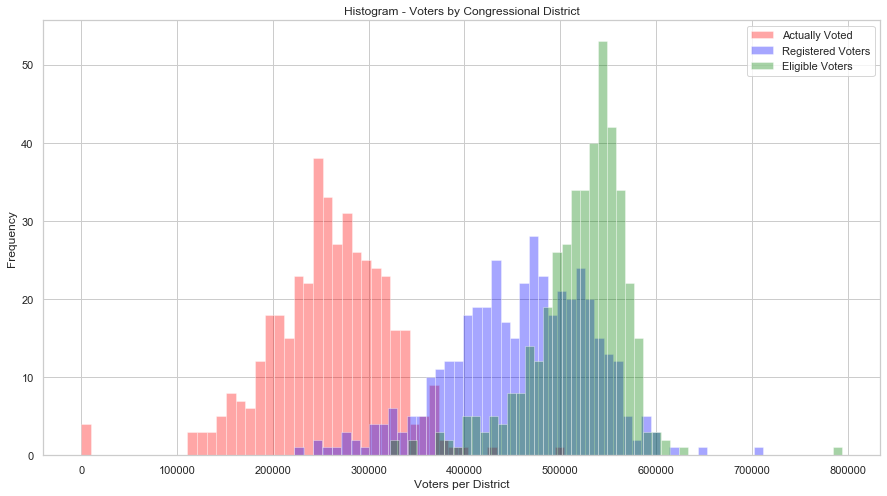

In [7]:
# Distribution of Eligibility 
f, ax = plt.subplots(figsize=(15,8))
plt.hist(house_df[6], bins=50, alpha=0.35, color="red", label="Actually Voted")
plt.hist(house_df[9], bins=50, alpha=0.35, color="blue", label="Registered Voters")
plt.hist(house_df[11], bins=50, alpha=0.35, color="green", label="Eligible Voters")
plt.ylabel("Frequency")
plt.xlabel("Voters per District")
plt.title("Histogram - Voters by Congressional District")
plt.legend()
plt.show()

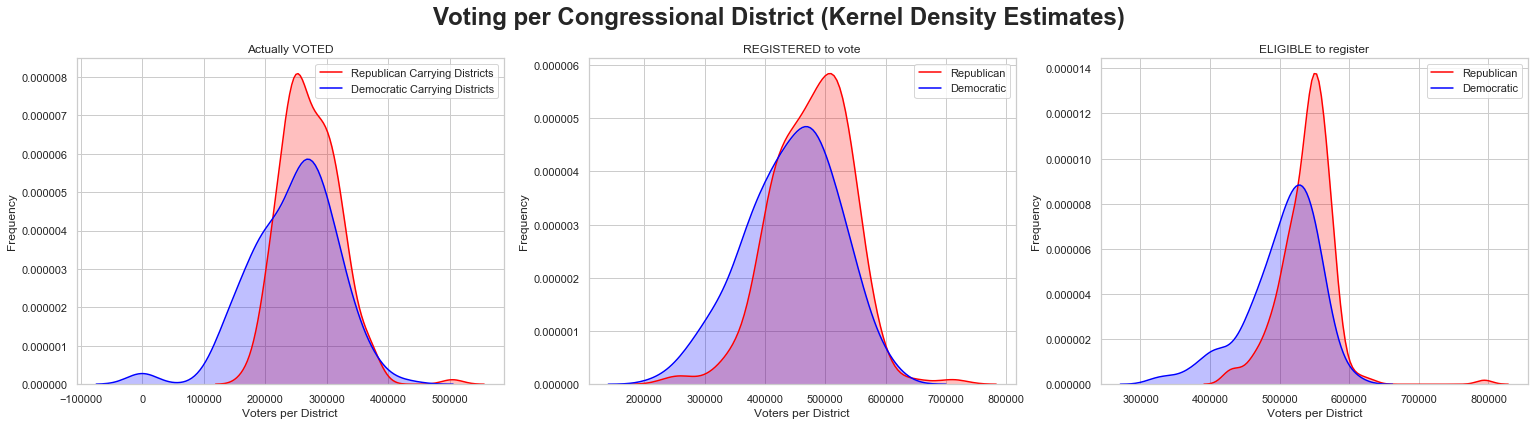

In [8]:
# Distribution of By Party 
fig, ax = plt.subplots(1,3, figsize=(26,6))
sns.kdeplot(republican_demographics[6], ax=ax[0], shade=True, color="red", label="Republican Carrying Districts")
sns.kdeplot(democrat_demographics[6], ax=ax[0], shade=True, color="blue", label="Democratic Carrying Districts")
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("Voters per District")
ax[0].set_title("Actually VOTED")
ax[0].legend()

sns.kdeplot(republican_demographics[9], ax=ax[1], shade=True, color="red", label="Republican")
sns.kdeplot(democrat_demographics[9], ax=ax[1], shade=True, color="blue", label="Democratic")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("Voters per District")
ax[1].set_title("REGISTERED to vote")
ax[1].legend()

sns.kdeplot(republican_demographics[11], ax=ax[2], shade=True, color="red", label="Republican")
sns.kdeplot(democrat_demographics[11], ax=ax[2], shade=True, color="blue", label="Democratic")
ax[2].set_ylabel("Frequency")
ax[2].set_xlabel("Voters per District")
ax[2].set_title("ELIGIBLE to register")
ax[2].legend()
plt.suptitle('Voting per Congressional District (Kernel Density Estimates)',y=1.0, fontweight="bold", fontsize=24)    
plt.show()

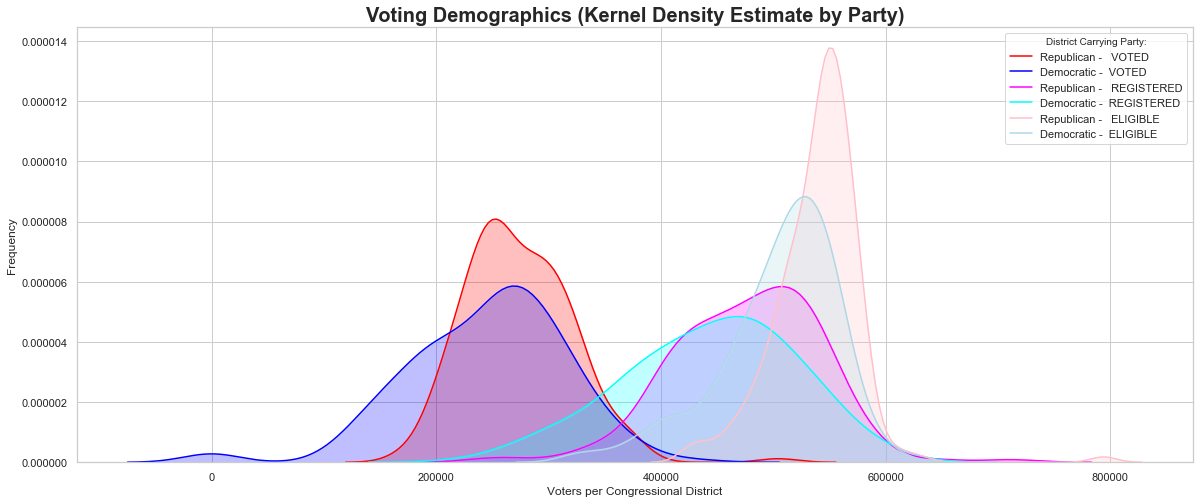

In [9]:
# Distribution of By Party 
fig, ax = plt.subplots(figsize=(20,8))
sns.kdeplot(republican_demographics[6], ax=ax, shade=True, color="red", label="Republican -   VOTED")
sns.kdeplot(democrat_demographics[6], ax=ax, shade=True, color="blue", label="Democratic -  VOTED")
sns.kdeplot(republican_demographics[9], ax=ax, shade=True, color="magenta", label="Republican -   REGISTERED")
sns.kdeplot(democrat_demographics[9], ax=ax, shade=True, color="cyan", label="Democratic -  REGISTERED")
sns.kdeplot(republican_demographics[11], ax=ax, shade=True, color="pink", label="Republican -   ELIGIBLE")
sns.kdeplot(democrat_demographics[11], ax=ax, shade=True, color="lightblue", label="Democratic -  ELIGIBLE")
ax.set_ylabel("Frequency")
ax.set_xlabel("Voters per Congressional District")
ax.set_title("Voting Demographics (Kernel Density Estimate by Party)", fontweight="bold", fontsize=20)
ax.legend(title="District Carrying Party:")

In [10]:
voter_group = house_df.copy()

voter_group = voter_group[voter_group[7] >= .30]
voter_group = voter_group[voter_group[7] <= .90]

voter_group['Percentile']= voter_group[7].rank(pct=True)

group1=np.where(voter_group['Percentile'] < 0.10)
group2=np.where(np.logical_and(np.greater_equal(voter_group['Percentile'],0.10),np.less(voter_group['Percentile'],0.20)))
group3=np.where(np.logical_and(np.greater_equal(voter_group['Percentile'],0.20),np.less(voter_group['Percentile'],0.30)))
group4=np.where(np.logical_and(np.greater_equal(voter_group['Percentile'],0.30),np.less(voter_group['Percentile'],0.40)))
group5=np.where(np.logical_and(np.greater_equal(voter_group['Percentile'],0.40),np.less(voter_group['Percentile'],0.50)))
group6=np.where(np.logical_and(np.greater_equal(voter_group['Percentile'],0.50),np.less(voter_group['Percentile'],0.60)))
group7=np.where(np.logical_and(np.greater_equal(voter_group['Percentile'],0.60),np.less(voter_group['Percentile'],0.70)))
group8=np.where(np.logical_and(np.greater_equal(voter_group['Percentile'],0.70),np.less(voter_group['Percentile'],0.80)))
group9=np.where(np.logical_and(np.greater_equal(voter_group['Percentile'],0.80),np.less(voter_group['Percentile'],0.90)))
group10=np.where(np.logical_and(np.greater_equal(voter_group['Percentile'],0.90),np.less(voter_group['Percentile'],1.0)))

In [11]:
percentile1 = voter_group[7].quantile(0.1)
percentile2 = voter_group[7].quantile(0.2)
percentile3 = voter_group[7].quantile(0.3)
percentile4 = voter_group[7].quantile(0.4)
percentile5 = voter_group[7].quantile(0.5)
percentile6 = voter_group[7].quantile(0.6)
percentile7 = voter_group[7].quantile(0.7)
percentile8 = voter_group[7].quantile(0.8)
percentile9 = voter_group[7].quantile(0.9)
percentile10 = voter_group[7].quantile(1)

label1 = ("0-%.0f%%"%(percentile1*100))
label2 = ("%.0f-%.0f%%"%((percentile1*100),(percentile2*100)))
label3 = ("%.0f-%.0f%%"%((percentile2*100),(percentile3*100)))
label4 = ("%.0f-%.0f%%"%((percentile3*100),(percentile4*100)))
label5 = ("%.0f-%.0f%%"%((percentile4*100),(percentile5*100)))
label6 = ("%.0f-%.0f%%"%((percentile5*100),(percentile6*100)))
label7 = ("%.0f-%.0f%%"%((percentile6*100),(percentile7*100)))
label8 = ("%.0f-%.0f%%"%((percentile7*100),(percentile8*100)))
label9 = ("%.0f-%.0f%%"%((percentile8*100),(percentile9*100)))
label10 = ("%.0f-%.0f%%"%((percentile9*100),(percentile10*100)))

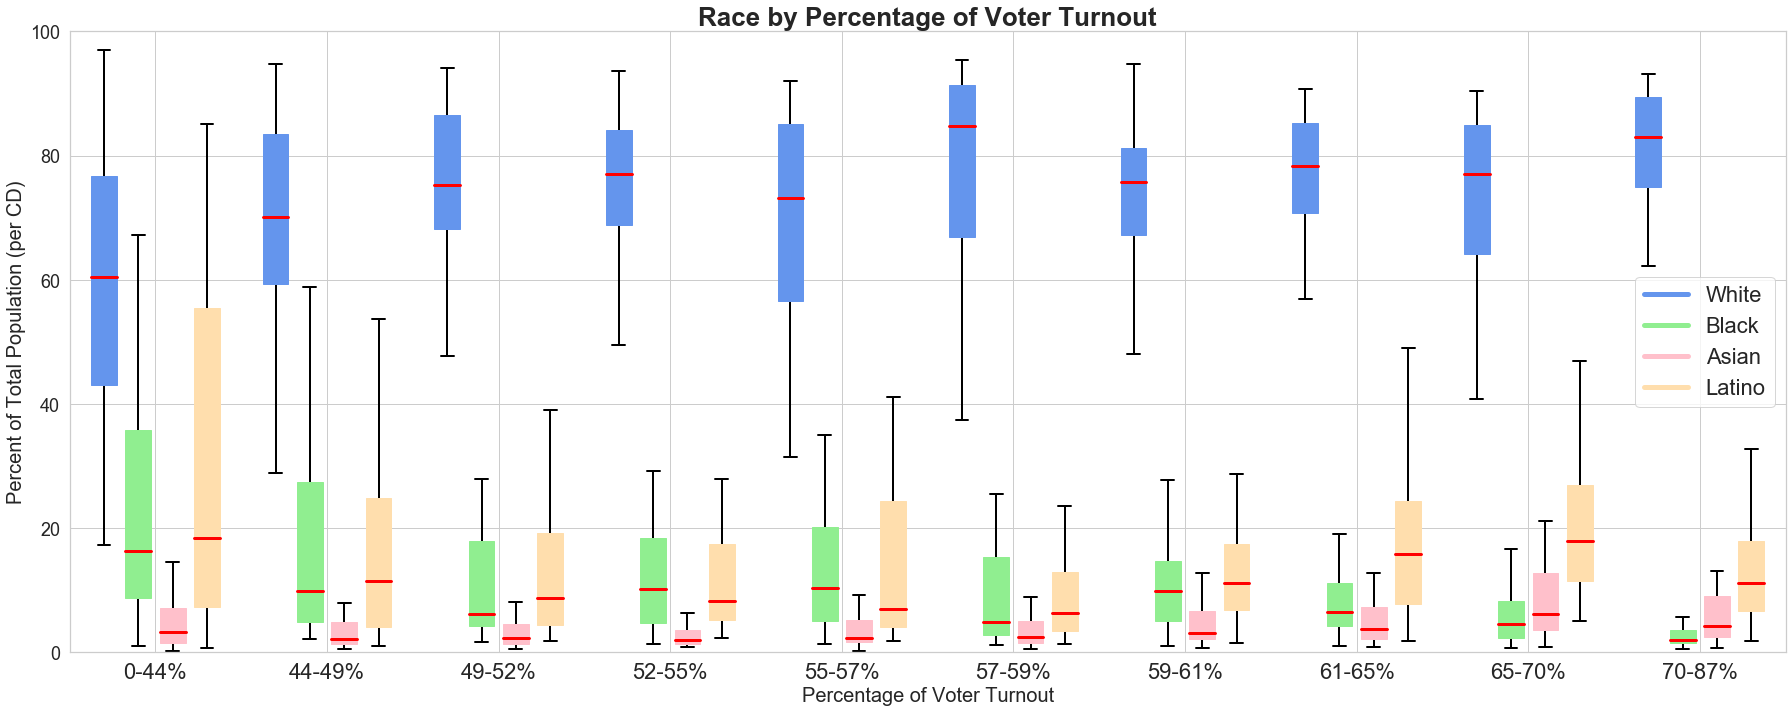

In [12]:
####################

# 45 - Race - White
group1_white = (voter_group[45].iloc[group1]/voter_group[25].iloc[group1])*100
group2_white = (voter_group[45].iloc[group2]/voter_group[25].iloc[group2])*100
group3_white = (voter_group[45].iloc[group3]/voter_group[25].iloc[group3])*100
group4_white = (voter_group[45].iloc[group4]/voter_group[25].iloc[group4])*100
group5_white = (voter_group[45].iloc[group5]/voter_group[25].iloc[group5])*100
group6_white = (voter_group[45].iloc[group6]/voter_group[25].iloc[group6])*100
group7_white = (voter_group[45].iloc[group7]/voter_group[25].iloc[group7])*100
group8_white = (voter_group[45].iloc[group8]/voter_group[25].iloc[group8])*100
group9_white = (voter_group[45].iloc[group9]/voter_group[25].iloc[group9])*100
group10_white = (voter_group[45].iloc[group10]/voter_group[25].iloc[group10])*100

group_white = [group1_white.to_list(),group2_white.to_list(),group3_white.to_list(),group4_white.to_list(),group5_white.to_list(),
               group6_white.to_list(),group7_white.to_list(),group8_white.to_list(),group9_white.to_list(),group10_white.to_list()]

# 46 - Race - Black
group1_black = (voter_group[46].iloc[group1]/voter_group[25].iloc[group1])*100
group2_black = (voter_group[46].iloc[group2]/voter_group[25].iloc[group2])*100
group3_black = (voter_group[46].iloc[group3]/voter_group[25].iloc[group3])*100
group4_black = (voter_group[46].iloc[group4]/voter_group[25].iloc[group4])*100
group5_black = (voter_group[46].iloc[group5]/voter_group[25].iloc[group5])*100
group6_black = (voter_group[46].iloc[group6]/voter_group[25].iloc[group6])*100
group7_black = (voter_group[46].iloc[group7]/voter_group[25].iloc[group7])*100
group8_black = (voter_group[46].iloc[group8]/voter_group[25].iloc[group8])*100
group9_black = (voter_group[46].iloc[group9]/voter_group[25].iloc[group9])*100
group10_black = (voter_group[46].iloc[group10]/voter_group[25].iloc[group10])*100

group_black = [group1_black.to_list(),group2_black.to_list(),group3_black.to_list(),group4_black.to_list(),group5_black.to_list(),
               group6_black.to_list(),group7_black.to_list(),group8_black.to_list(),group9_black.to_list(),group10_black.to_list()]

# 48 - Race - Asian
group1_asian = (voter_group[48].iloc[group1]/voter_group[25].iloc[group1])*100
group2_asian = (voter_group[48].iloc[group2]/voter_group[25].iloc[group2])*100
group3_asian = (voter_group[48].iloc[group3]/voter_group[25].iloc[group3])*100
group4_asian = (voter_group[48].iloc[group4]/voter_group[25].iloc[group4])*100
group5_asian = (voter_group[48].iloc[group5]/voter_group[25].iloc[group5])*100
group6_asian = (voter_group[48].iloc[group6]/voter_group[25].iloc[group6])*100
group7_asian = (voter_group[48].iloc[group7]/voter_group[25].iloc[group7])*100
group8_asian = (voter_group[48].iloc[group8]/voter_group[25].iloc[group8])*100
group9_asian = (voter_group[48].iloc[group9]/voter_group[25].iloc[group9])*100
group10_asian = (voter_group[48].iloc[group10]/voter_group[25].iloc[group10])*100

group_asian = [group1_asian.to_list(),group2_asian.to_list(),group3_asian.to_list(),group4_asian.to_list(),group5_asian.to_list(),
               group6_asian.to_list(),group7_asian.to_list(),group8_asian.to_list(),group9_asian.to_list(),group10_asian.to_list()]

# 53 - Race - Latino
group1_latino = (voter_group[53].iloc[group1]/voter_group[25].iloc[group1])*100
group2_latino = (voter_group[53].iloc[group2]/voter_group[25].iloc[group2])*100
group3_latino = (voter_group[53].iloc[group3]/voter_group[25].iloc[group3])*100
group4_latino = (voter_group[53].iloc[group4]/voter_group[25].iloc[group4])*100
group5_latino = (voter_group[53].iloc[group5]/voter_group[25].iloc[group5])*100
group6_latino = (voter_group[53].iloc[group6]/voter_group[25].iloc[group6])*100
group7_latino = (voter_group[53].iloc[group7]/voter_group[25].iloc[group7])*100
group8_latino = (voter_group[53].iloc[group8]/voter_group[25].iloc[group8])*100
group9_latino = (voter_group[53].iloc[group9]/voter_group[25].iloc[group9])*100
group10_latino = (voter_group[53].iloc[group10]/voter_group[25].iloc[group10])*100

group_latino = [group1_latino.to_list(),group2_latino.to_list(),group3_latino.to_list(),group4_latino.to_list(),group5_latino.to_list(),
               group6_latino.to_list(),group7_latino.to_list(),group8_latino.to_list(),group9_latino.to_list(),group10_latino.to_list()]

ticks = labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black', linewidth=2)
    plt.setp(bp['caps'], color='black', linewidth=2)
    plt.setp(bp['medians'], color='red', linewidth=3)

f, ax = plt.subplots(figsize=(25,10))

bpwhite = plt.boxplot(group_white, patch_artist=True, positions=np.array(range(len(group_white)))*2.0-0.6, sym='', widths=0.3)
bpblack = plt.boxplot(group_black,patch_artist=True, positions=np.array(range(len(group_black)))*2.0-0.2, sym='', widths=0.3)
bpasian = plt.boxplot(group_asian, patch_artist=True,positions=np.array(range(len(group_asian)))*2.0+0.2, sym='', widths=0.3)
bplatino = plt.boxplot(group_latino,patch_artist=True, positions=np.array(range(len(group_latino)))*2.0+0.6, sym='', widths=0.3)

set_box_color(bpwhite, 'cornflowerblue') 
set_box_color(bpblack, 'lightgreen')
set_box_color(bpasian, 'pink')
set_box_color(bplatino, 'navajowhite')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='cornflowerblue', label='White', linewidth=5)
plt.plot([], c='lightgreen', label='Black', linewidth=5)
plt.plot([], c='pink', label='Asian', linewidth=5)
plt.plot([], c='navajowhite', label='Latino', linewidth=5)
plt.legend(fontsize=22)

plt.ylabel('Percent of Total Population (per CD)', fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=22)
plt.title('Race by Percentage of Voter Turnout', fontsize=26, fontweight='bold')
plt.xlim(-1, len(ticks)*1.9)
plt.ylim(0, 100)
plt.xlabel('Percentage of Voter Turnout',fontsize=20)
plt.tight_layout()
plt.show()

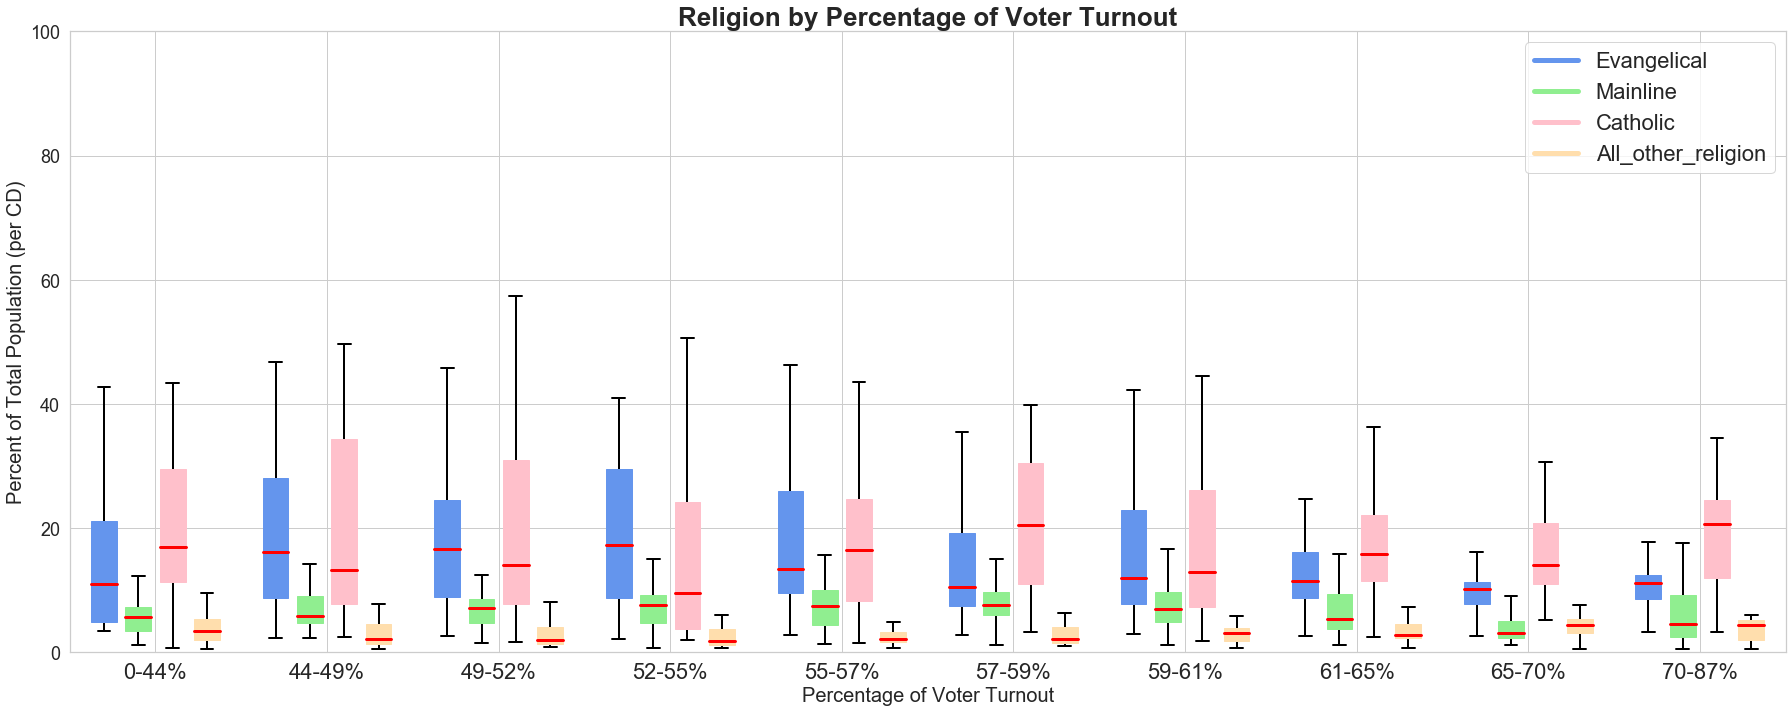

In [13]:
####################
## Religion
# 398 - nan, nan, All Evangelical
group1_evangelical = (voter_group[398].iloc[group1]/voter_group[25].iloc[group1])*100
group2_evangelical = (voter_group[398].iloc[group2]/voter_group[25].iloc[group2])*100
group3_evangelical = (voter_group[398].iloc[group3]/voter_group[25].iloc[group3])*100
group4_evangelical = (voter_group[398].iloc[group4]/voter_group[25].iloc[group4])*100
group5_evangelical = (voter_group[398].iloc[group5]/voter_group[25].iloc[group5])*100
group6_evangelical = (voter_group[398].iloc[group6]/voter_group[25].iloc[group6])*100
group7_evangelical = (voter_group[398].iloc[group7]/voter_group[25].iloc[group7])*100
group8_evangelical = (voter_group[398].iloc[group8]/voter_group[25].iloc[group8])*100
group9_evangelical = (voter_group[398].iloc[group9]/voter_group[25].iloc[group9])*100
group10_evangelical = (voter_group[398].iloc[group10]/voter_group[25].iloc[group10])*100

group_evangelical = [group1_evangelical.to_list(),group2_evangelical.to_list(),group3_evangelical.to_list(),group4_evangelical.to_list(),group5_evangelical.to_list(),
               group6_evangelical.to_list(),group7_evangelical.to_list(),group8_evangelical.to_list(),group9_evangelical.to_list(),group10_evangelical.to_list()]

# 400 - All Mainline
group1_mainline = (voter_group[400].iloc[group1]/voter_group[25].iloc[group1])*100
group2_mainline = (voter_group[400].iloc[group2]/voter_group[25].iloc[group2])*100
group3_mainline = (voter_group[400].iloc[group3]/voter_group[25].iloc[group3])*100
group4_mainline = (voter_group[400].iloc[group4]/voter_group[25].iloc[group4])*100
group5_mainline = (voter_group[400].iloc[group5]/voter_group[25].iloc[group5])*100
group6_mainline = (voter_group[400].iloc[group6]/voter_group[25].iloc[group6])*100
group7_mainline = (voter_group[400].iloc[group7]/voter_group[25].iloc[group7])*100
group8_mainline = (voter_group[400].iloc[group8]/voter_group[25].iloc[group8])*100
group9_mainline = (voter_group[400].iloc[group9]/voter_group[25].iloc[group9])*100
group10_mainline = (voter_group[400].iloc[group10]/voter_group[25].iloc[group10])*100

group_mainline = [group1_mainline.to_list(),group2_mainline.to_list(),group3_mainline.to_list(),group4_mainline.to_list(),group5_mainline.to_list(),
               group6_mainline.to_list(),group7_mainline.to_list(),group8_mainline.to_list(),group9_mainline.to_list(),group10_mainline.to_list()]

# 401 - All Orthodox
#group1_orthodox = (voter_group[401].iloc[group1]/voter_group[25].iloc[group1])*100
#group2_orthodox = (voter_group[401].iloc[group2]/voter_group[25].iloc[group2])*100
#group3_orthodox = (voter_group[401].iloc[group3]/voter_group[25].iloc[group3])*100
#group4_orthodox = (voter_group[401].iloc[group4]/voter_group[25].iloc[group4])*100
#group5_orthodox = (voter_group[401].iloc[group5]/voter_group[25].iloc[group5])*100
#group6_orthodox = (voter_group[401].iloc[group6]/voter_group[25].iloc[group6])*100
#group7_orthodox = (voter_group[401].iloc[group7]/voter_group[25].iloc[group7])*100
#group8_orthodox = (voter_group[401].iloc[group8]/voter_group[25].iloc[group8])*100
#group9_orthodox = (voter_group[401].iloc[group9]/voter_group[25].iloc[group9])*100
#group10_orthodox = (voter_group[401].iloc[group10]/voter_group[25].iloc[group10])*100

#group_orthodox = [group1_orthodox.to_list(),group2_orthodox.to_list(),group3_orthodox.to_list(),group4_orthodox.to_list(),group5_orthodox.to_list(),
#               group6_orthodox.to_list(),group7_orthodox.to_list(),group8_orthodox.to_list(),group9_orthodox.to_list(),group10_orthodox.to_list()]
              
# 402 - All catholic
group1_catholic = (voter_group[402].iloc[group1]/voter_group[25].iloc[group1])*100
group2_catholic = (voter_group[402].iloc[group2]/voter_group[25].iloc[group2])*100
group3_catholic = (voter_group[402].iloc[group3]/voter_group[25].iloc[group3])*100
group4_catholic = (voter_group[402].iloc[group4]/voter_group[25].iloc[group4])*100
group5_catholic = (voter_group[402].iloc[group5]/voter_group[25].iloc[group5])*100
group6_catholic = (voter_group[402].iloc[group6]/voter_group[25].iloc[group6])*100
group7_catholic = (voter_group[402].iloc[group7]/voter_group[25].iloc[group7])*100
group8_catholic = (voter_group[402].iloc[group8]/voter_group[25].iloc[group8])*100
group9_catholic = (voter_group[402].iloc[group9]/voter_group[25].iloc[group9])*100
group10_catholic = (voter_group[402].iloc[group10]/voter_group[25].iloc[group10])*100

group_catholic = [group1_catholic.to_list(),group2_catholic.to_list(),group3_catholic.to_list(),group4_catholic.to_list(),group5_catholic.to_list(),
               group6_catholic.to_list(),group7_catholic.to_list(),group8_catholic.to_list(),group9_catholic.to_list(),group10_catholic.to_list()]

# 403 - All Other Religion
group1_all_other_religion = (voter_group[403].iloc[group1]/voter_group[25].iloc[group1])*100
group2_all_other_religion = (voter_group[403].iloc[group2]/voter_group[25].iloc[group2])*100
group3_all_other_religion = (voter_group[403].iloc[group3]/voter_group[25].iloc[group3])*100
group4_all_other_religion = (voter_group[403].iloc[group4]/voter_group[25].iloc[group4])*100
group5_all_other_religion = (voter_group[403].iloc[group5]/voter_group[25].iloc[group5])*100
group6_all_other_religion = (voter_group[403].iloc[group6]/voter_group[25].iloc[group6])*100
group7_all_other_religion = (voter_group[403].iloc[group7]/voter_group[25].iloc[group7])*100
group8_all_other_religion = (voter_group[403].iloc[group8]/voter_group[25].iloc[group8])*100
group9_all_other_religion = (voter_group[403].iloc[group9]/voter_group[25].iloc[group9])*100
group10_all_other_religion = (voter_group[403].iloc[group10]/voter_group[25].iloc[group10])*100

group_all_other_religion = [group1_all_other_religion.to_list(),group2_all_other_religion.to_list(),group3_all_other_religion.to_list(),group4_all_other_religion.to_list(),group5_all_other_religion.to_list(),
               group6_all_other_religion.to_list(),group7_all_other_religion.to_list(),group8_all_other_religion.to_list(),group9_all_other_religion.to_list(),group10_all_other_religion.to_list()]

ticks = labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10]



def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black', linewidth=2)
    plt.setp(bp['caps'], color='black', linewidth=2)
    plt.setp(bp['medians'], color='red', linewidth=3)

f, ax = plt.subplots(figsize=(25,10))

bpevangelical = plt.boxplot(group_evangelical, patch_artist=True, positions=np.array(range(len(group_evangelical)))*2.0-0.6, sym='', widths=0.3)
bpmainline = plt.boxplot(group_mainline,patch_artist=True, positions=np.array(range(len(group_mainline)))*2.0-0.2, sym='', widths=0.3)
#bporthodox = plt.boxplot(group_orthodox, patch_artist=True,positions=np.array(range(len(group_orthodox)))*2.0+0.2, sym='', widths=0.3)
bpcatholic = plt.boxplot(group_catholic, patch_artist=True,positions=np.array(range(len(group_catholic)))*2.0+0.2, sym='', widths=0.3)

bpall_other_religion = plt.boxplot(group_all_other_religion,patch_artist=True, positions=np.array(range(len(group_all_other_religion)))*2.0+0.6, sym='', widths=0.3)

set_box_color(bpevangelical, 'cornflowerblue') 
set_box_color(bpmainline, 'lightgreen')
set_box_color(bpcatholic, 'pink')
set_box_color(bpall_other_religion, 'navajowhite')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='cornflowerblue', label='Evangelical', linewidth=5)
plt.plot([], c='lightgreen', label='Mainline', linewidth=5)
plt.plot([], c='pink', label='Catholic', linewidth=5)
plt.plot([], c='navajowhite', label='All_other_religion', linewidth=5)
plt.legend(fontsize=22)

plt.ylabel('Percent of Total Population (per CD)', fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=22)
plt.title('Religion by Percentage of Voter Turnout', fontsize=26, fontweight='bold')
plt.xlim(-1, len(ticks)*1.9)
plt.ylim(0, 100)
plt.xlabel('Percentage of Voter Turnout',fontsize=20)
plt.tight_layout()
plt.show()

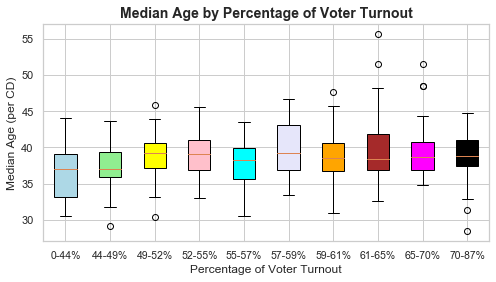

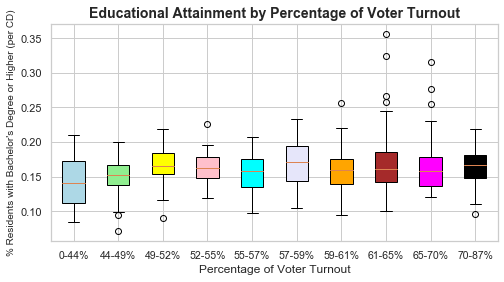

In [14]:
# 41-MEDIAN AGE

group1_age = voter_group[41].iloc[group1]
group2_age = voter_group[41].iloc[group2]
group3_age = voter_group[41].iloc[group3]
group4_age = voter_group[41].iloc[group4]
group5_age = voter_group[41].iloc[group5]
group6_age = voter_group[41].iloc[group6]
group7_age = voter_group[41].iloc[group7]
group8_age = voter_group[41].iloc[group8]
group9_age = voter_group[41].iloc[group9]
group10_age = voter_group[41].iloc[group10]

plot_4_list = [group1_age, group2_age, group3_age,group4_age,group5_age,group6_age,group7_age,group8_age,group9_age,group10_age]

f, ax = plt.subplots(figsize=(8,4))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xlabel('Percentage of Voter Turnout', fontsize=12)
plt.xticks(fontsize=10.5)
plt.ylabel('Median Age (per CD)', fontsize=12)
colors = ['lightblue', 'lightgreen', 'yellow', 'pink', 'cyan', 'lavender', 'orange', 'brown', 'magenta','black']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Median Age by Percentage of Voter Turnout', fontsize=14, fontweight='bold')
plt.show()


# 42 - Elderly Voters
group1_elderly = voter_group[42].iloc[group1]/voter_group[25].iloc[group1]
group2_elderly = voter_group[42].iloc[group2]/voter_group[25].iloc[group2]
group3_elderly = voter_group[42].iloc[group3]/voter_group[25].iloc[group3]
group4_elderly = voter_group[42].iloc[group4]/voter_group[25].iloc[group4]
group5_elderly = voter_group[42].iloc[group5]/voter_group[25].iloc[group5]
group6_elderly = voter_group[42].iloc[group6]/voter_group[25].iloc[group6]
group7_elderly = voter_group[42].iloc[group7]/voter_group[25].iloc[group7]
group8_elderly = voter_group[42].iloc[group8]/voter_group[25].iloc[group8]
group9_elderly = voter_group[42].iloc[group9]/voter_group[25].iloc[group9]
group10_elderly = voter_group[42].iloc[group10]/voter_group[25].iloc[group10]

plot_4_list = [group1_elderly, group2_elderly, group3_elderly,group4_elderly,group5_elderly,group6_elderly,group7_elderly,group8_elderly,group9_elderly,group10_elderly]

f, ax = plt.subplots(figsize=(8,4))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xlabel('Percentage of Voter Turnout', fontsize=12)
plt.xticks(fontsize=10.5)
plt.ylabel('% Residents with Bachelor\'s Degree or Higher (per CD)', fontsize=10)
colors = ['lightblue', 'lightgreen', 'yellow', 'pink', 'cyan', 'lavender', 'orange', 'brown', 'magenta','black']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Educational Attainment by Percentage of Voter Turnout', fontsize=14, fontweight='bold')
plt.show()

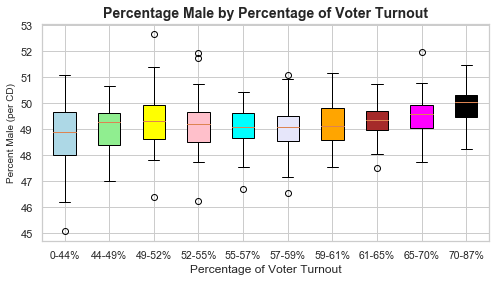

In [15]:
group1_male = voter_group[26].iloc[group1]/voter_group[25].iloc[group1]*100
group2_male = voter_group[26].iloc[group2]/voter_group[25].iloc[group2]*100
group1_male = voter_group[26].iloc[group1]/voter_group[25].iloc[group1]*100
group2_male = voter_group[26].iloc[group2]/voter_group[25].iloc[group2]*100
group3_male = voter_group[26].iloc[group3]/voter_group[25].iloc[group3]*100
group4_male = voter_group[26].iloc[group4]/voter_group[25].iloc[group4]*100
group5_male = voter_group[26].iloc[group5]/voter_group[25].iloc[group5]*100
group6_male = voter_group[26].iloc[group6]/voter_group[25].iloc[group6]*100
group7_male = voter_group[26].iloc[group7]/voter_group[25].iloc[group7]*100
group8_male = voter_group[26].iloc[group8]/voter_group[25].iloc[group8]*100
group9_male = voter_group[26].iloc[group9]/voter_group[25].iloc[group9]*100
group10_male = voter_group[26].iloc[group10]/voter_group[25].iloc[group10]*100




plot_4_list = [group1_male, group2_male, group3_male, group4_male, group5_male, group6_male, group7_male, group8_male, group9_male, group10_male]

f, ax = plt.subplots(figsize=(8,4))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xlabel('Percentage of Voter Turnout', fontsize=12)
plt.xticks(fontsize=10.5)
plt.ylabel('Percent Male (per CD)', fontsize=10)
colors = ['lightblue', 'lightgreen', 'yellow', 'pink', 'cyan', 'lavender', 'orange', 'brown', 'magenta','black']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Percentage Male by Percentage of Voter Turnout', fontsize=14, fontweight='bold')
plt.show()

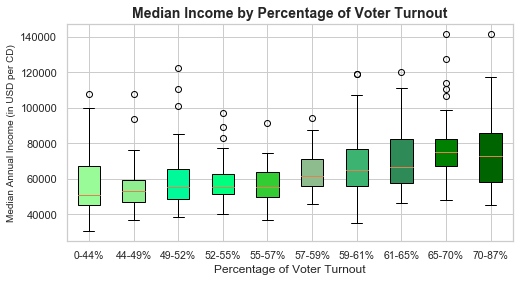

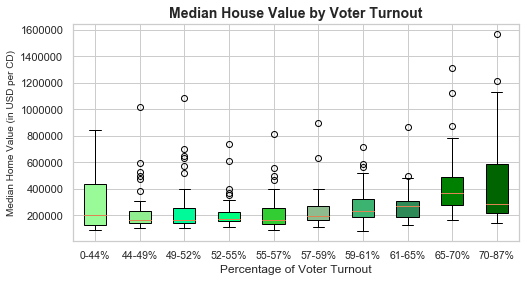

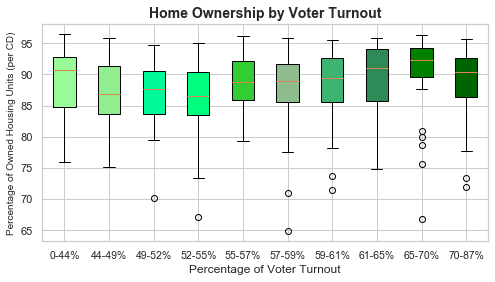

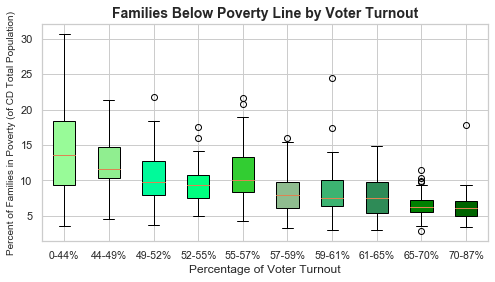

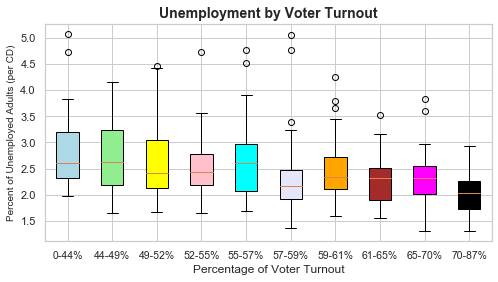

In [16]:
# PLOT - 222-MEDIAN INCOME, 223-MEAN INCOME
group1_income = voter_group[222].iloc[group1]
group2_income = voter_group[222].iloc[group2]
group3_income = voter_group[222].iloc[group3]
group4_income = voter_group[222].iloc[group4]
group5_income = voter_group[222].iloc[group5]
group6_income = voter_group[222].iloc[group6]
group7_income = voter_group[222].iloc[group7]
group8_income = voter_group[222].iloc[group8]
group9_income = voter_group[222].iloc[group9]
group10_income = voter_group[222].iloc[group10]

plot_4_list = [group1_income, group2_income, group3_income,group4_income,group5_income,group6_income,group7_income,group8_income,group9_income,group10_income]

f, ax = plt.subplots(figsize=(8,4))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xlabel("Percentage of Voter Turnout", fontsize=12)
plt.xticks(fontsize=10.5)
plt.ylabel('Median Annual Income (in USD per CD)', fontsize=10)
colors = ['palegreen', 'lightgreen', 'mediumspringgreen', 'springgreen', 'limegreen', 'darkseagreen', 'mediumseagreen', 'seagreen', 'green', 'darkgreen']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Median Income by Percentage of Voter Turnout', fontsize=14, fontweight='bold')
plt.show()

##############################

# 180-MEDIAN HOUSE VALUE
group1_house_value = voter_group[180].iloc[group1]
group2_house_value = voter_group[180].iloc[group2]
group3_house_value = voter_group[180].iloc[group3]
group4_house_value = voter_group[180].iloc[group4]
group5_house_value = voter_group[180].iloc[group5]
group6_house_value = voter_group[180].iloc[group6]
group7_house_value = voter_group[180].iloc[group7]
group8_house_value = voter_group[180].iloc[group8]
group9_house_value = voter_group[180].iloc[group9]
group10_house_value = voter_group[180].iloc[group10]

plot_4_list = [group1_house_value, group2_house_value, group3_house_value,group4_house_value,group5_house_value,group6_house_value,
               group7_house_value,group8_house_value,group9_house_value,group10_house_value]

f, ax = plt.subplots(figsize=(8,4))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xticks(fontsize=10.5)
plt.xlabel("Percentage of Voter Turnout", fontsize=12)
plt.ylabel('Median Home Value (in USD per CD)', fontsize=10)
colors = ['palegreen', 'lightgreen', 'mediumspringgreen', 'springgreen', 'limegreen', 'darkseagreen', 'mediumseagreen', 'seagreen', 'green', 'darkgreen']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Median House Value by Voter Turnout', fontsize=14, fontweight='bold')
plt.show()

##############################

# PERCENTAGE OF HOMEOWNERSHIP (159/154)

group1_own = (voter_group[159].iloc[group1]/voter_group[154].iloc[group1])*100
group2_own = (voter_group[159].iloc[group2]/voter_group[154].iloc[group2])*100
group3_own = (voter_group[159].iloc[group3]/voter_group[154].iloc[group3])*100
group4_own = (voter_group[159].iloc[group4]/voter_group[154].iloc[group4])*100
group5_own = (voter_group[159].iloc[group5]/voter_group[154].iloc[group5])*100
group6_own = (voter_group[159].iloc[group6]/voter_group[154].iloc[group6])*100
group7_own = (voter_group[159].iloc[group7]/voter_group[154].iloc[group7])*100
group8_own = (voter_group[159].iloc[group8]/voter_group[154].iloc[group8])*100
group9_own = (voter_group[159].iloc[group9]/voter_group[154].iloc[group9])*100
group10_own = (voter_group[159].iloc[group10]/voter_group[154].iloc[group10])*100

plot_4_list = [group1_own, group2_own, group3_own,group4_own,group5_own,group6_own,group7_own,group8_own,group9_own,group10_own]

f, ax = plt.subplots(figsize=(8,4))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xticks(fontsize=10.5)
plt.xlabel("Percentage of Voter Turnout", fontsize=12)
plt.ylabel('Percentage of Owned Housing Units (per CD)', fontsize=10)
colors = ['palegreen', 'lightgreen', 'mediumspringgreen', 'springgreen', 'limegreen', 'darkseagreen', 'mediumseagreen', 'seagreen', 'green', 'darkgreen']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Home Ownership by Voter Turnout', fontsize=14, fontweight='bold')
plt.show()

##############################

# 231 - PERCENT OF FAMILIES IN POVERTY
group1_employed = voter_group[231].iloc[group1]
group2_employed = voter_group[231].iloc[group2]
group3_employed = voter_group[231].iloc[group3]
group4_employed = voter_group[231].iloc[group4]
group5_employed = voter_group[231].iloc[group5]
group6_employed = voter_group[231].iloc[group6]
group7_employed = voter_group[231].iloc[group7]
group8_employed = voter_group[231].iloc[group8]
group9_employed = voter_group[231].iloc[group9]
group10_employed = voter_group[231].iloc[group10]

plot_4_list = [group1_employed, group2_employed, group3_employed,group4_employed,group5_employed,group6_employed,
               group7_employed,group8_employed,group9_employed,group10_employed]

f, ax = plt.subplots(figsize=(8,4))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xticks(fontsize=10.5)
plt.xlabel("Percentage of Voter Turnout", fontsize=12)
plt.ylabel('Percent of Families in Poverty (of CD Total Population)', fontsize=10)
colors = ['palegreen', 'lightgreen', 'mediumspringgreen', 'springgreen', 'limegreen', 'darkseagreen', 'mediumseagreen', 'seagreen', 'green', 'darkgreen']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Families Below Poverty Line by Voter Turnout', fontsize=14, fontweight='bold')
plt.show()

##############################

# 116 - UNEMPLOYED
group1_unemployed = (voter_group[116].iloc[group1]/voter_group[25].iloc[group1])*100
group2_unemployed = (voter_group[116].iloc[group2]/voter_group[25].iloc[group2])*100
group3_unemployed = (voter_group[116].iloc[group3]/voter_group[25].iloc[group3])*100
group4_unemployed = (voter_group[116].iloc[group4]/voter_group[25].iloc[group4])*100
group5_unemployed = (voter_group[116].iloc[group5]/voter_group[25].iloc[group5])*100
group6_unemployed = (voter_group[116].iloc[group6]/voter_group[25].iloc[group6])*100
group7_unemployed = (voter_group[116].iloc[group7]/voter_group[25].iloc[group7])*100
group8_unemployed = (voter_group[116].iloc[group8]/voter_group[25].iloc[group8])*100
group9_unemployed = (voter_group[116].iloc[group9]/voter_group[25].iloc[group9])*100
group10_unemployed = (voter_group[116].iloc[group10]/voter_group[25].iloc[group10])*100

plot_6_list = [group1_unemployed, group2_unemployed, group3_unemployed,group4_unemployed,group5_unemployed,group6_unemployed,
               group7_unemployed,group8_unemployed,group9_unemployed,group10_unemployed]


f, ax = plt.subplots(figsize=(8,4))
box_plot_data=plot_6_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xticks(fontsize=10.5)
plt.xlabel("Percentage of Voter Turnout", fontsize=12)
plt.ylabel('Percent of Unemployed Adults (per CD)', fontsize=10)
colors = ['lightblue', 'lightgreen', 'yellow', 'pink', 'cyan', 'lavender', 'orange', 'brown', 'magenta', 'black']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Unemployment by Voter Turnout', fontsize=14, fontweight='bold')
plt.show()

##############################

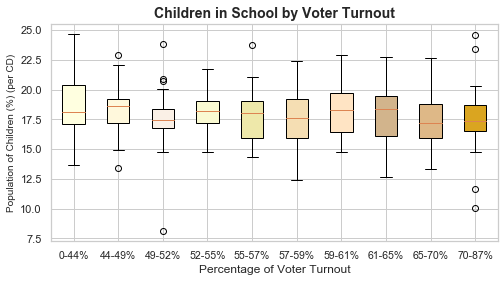

In [17]:
##############################

# NUMBER OF SCHOOL CHILDREN IN THE DISTRICT

# 250 - 253 - If there are more kids, there are more families with kids, and they are incentivised to go and vote

group1_kids = ((voter_group[250].iloc[group1]+voter_group[251].iloc[group1]+voter_group[252].iloc[group1]+voter_group[253].iloc[group1])/voter_group[25].iloc[group1])*100
group2_kids = ((voter_group[250].iloc[group2]+voter_group[251].iloc[group2]+voter_group[252].iloc[group2]+voter_group[253].iloc[group2])/voter_group[25].iloc[group2])*100
group3_kids = ((voter_group[250].iloc[group3]+voter_group[251].iloc[group3]+voter_group[252].iloc[group3]+voter_group[253].iloc[group3])/voter_group[25].iloc[group3])*100
group4_kids = ((voter_group[250].iloc[group4]+voter_group[251].iloc[group4]+voter_group[252].iloc[group4]+voter_group[253].iloc[group4])/voter_group[25].iloc[group4])*100
group5_kids = ((voter_group[250].iloc[group5]+voter_group[251].iloc[group5]+voter_group[252].iloc[group5]+voter_group[253].iloc[group5])/voter_group[25].iloc[group5])*100
group6_kids = ((voter_group[250].iloc[group6]+voter_group[251].iloc[group6]+voter_group[252].iloc[group6]+voter_group[253].iloc[group6])/voter_group[25].iloc[group6])*100
group7_kids = ((voter_group[250].iloc[group7]+voter_group[251].iloc[group7]+voter_group[252].iloc[group7]+voter_group[253].iloc[group7])/voter_group[25].iloc[group7])*100
group8_kids = ((voter_group[250].iloc[group8]+voter_group[251].iloc[group8]+voter_group[252].iloc[group8]+voter_group[253].iloc[group8])/voter_group[25].iloc[group8])*100
group9_kids = ((voter_group[250].iloc[group9]+voter_group[251].iloc[group9]+voter_group[252].iloc[group9]+voter_group[253].iloc[group9])/voter_group[25].iloc[group9])*100
group10_kids = ((voter_group[250].iloc[group10]+voter_group[251].iloc[group10]+voter_group[252].iloc[group10]+voter_group[253].iloc[group10])/voter_group[25].iloc[group10])*100

plot_4_list = [group1_kids, group2_kids, group3_kids,group4_kids,group5_kids,group6_kids,group7_kids,group8_kids,group9_kids,group10_kids]

f, ax = plt.subplots(figsize=(8,4))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xticks(fontsize=10.5)
plt.ylabel('Population of Children (%) (per CD)', fontsize=10)
plt.xlabel("Percentage of Voter Turnout", fontsize=12)
colors = ['lightyellow', 'cornsilk', 'linen', 'lightgoldenrodyellow', 'palegoldenrod', 'wheat', 'bisque', 'tan', 'burlywood', 'goldenrod']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Children in School by Voter Turnout', fontsize=14, fontweight='bold')
plt.show()




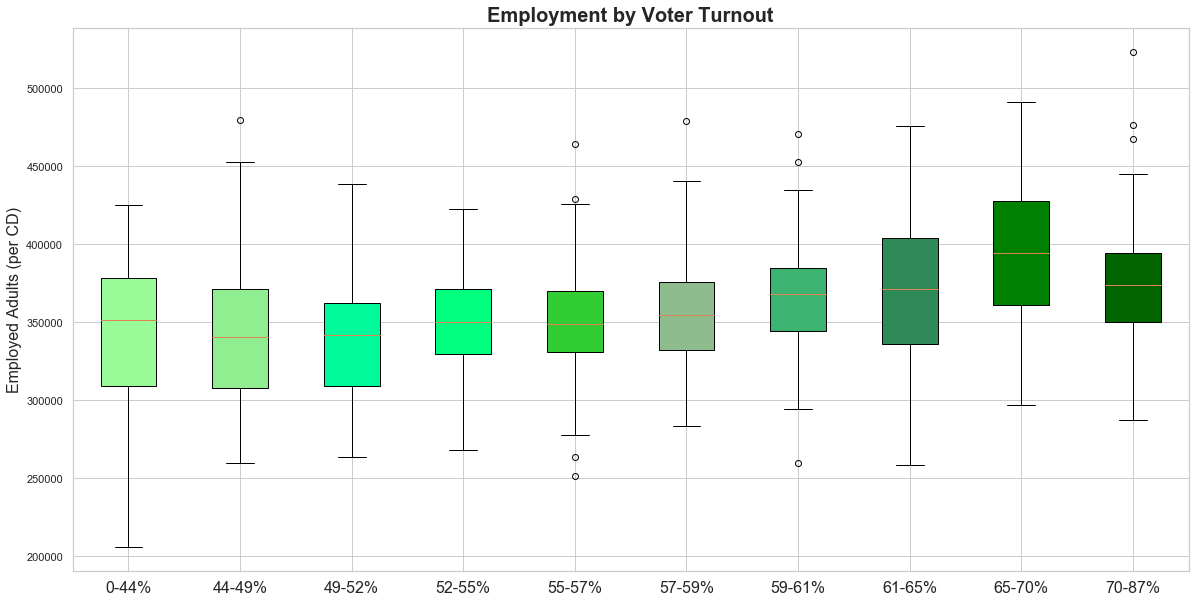

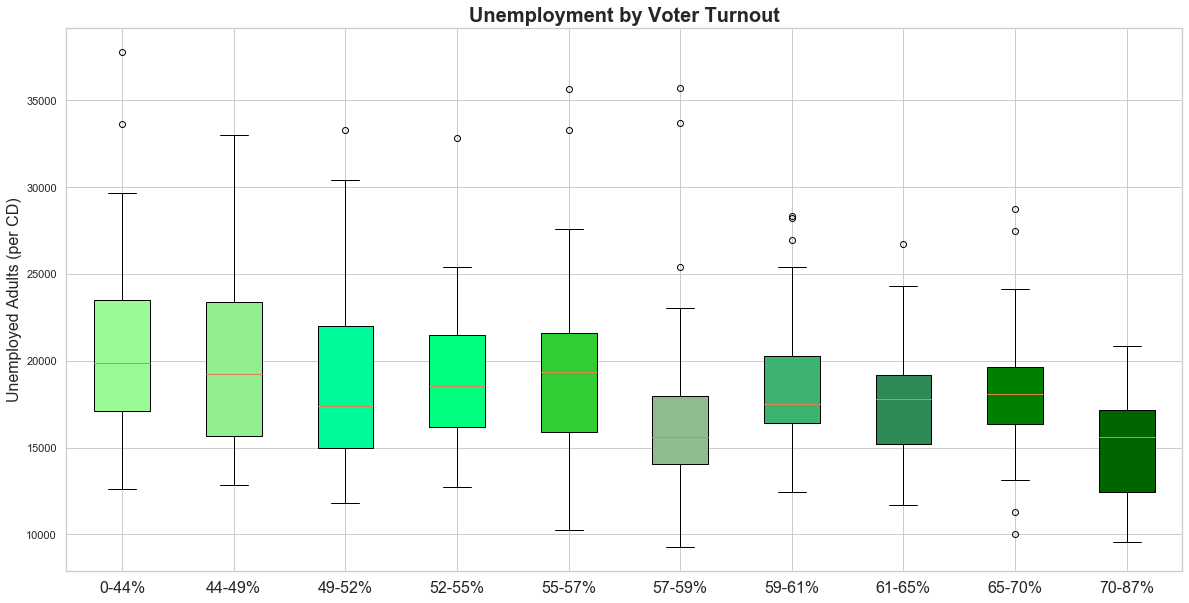

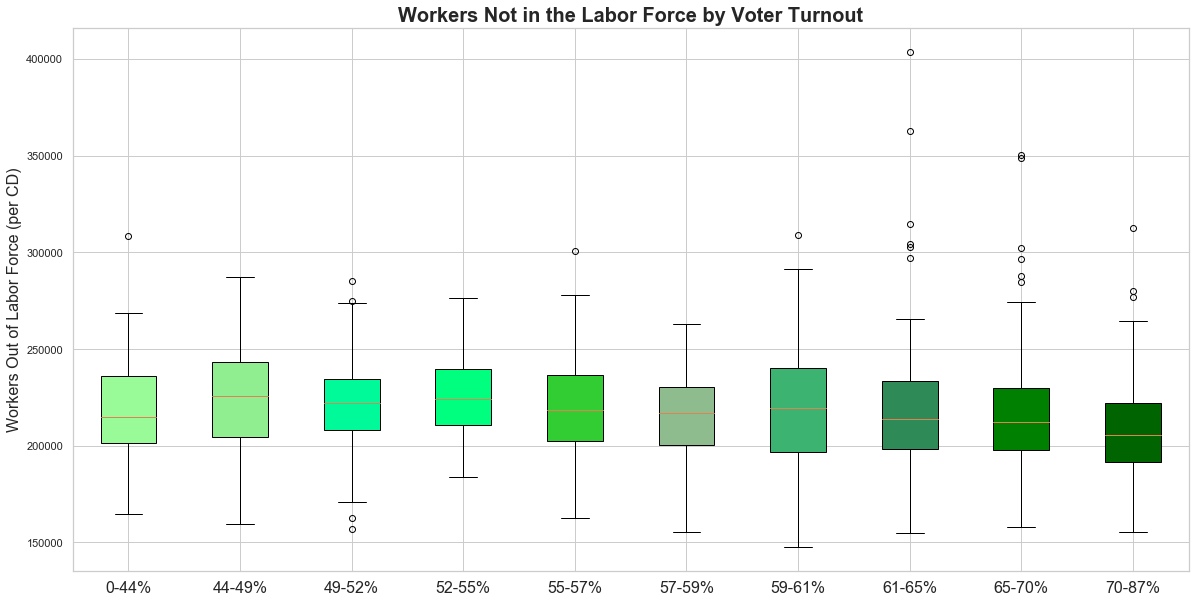

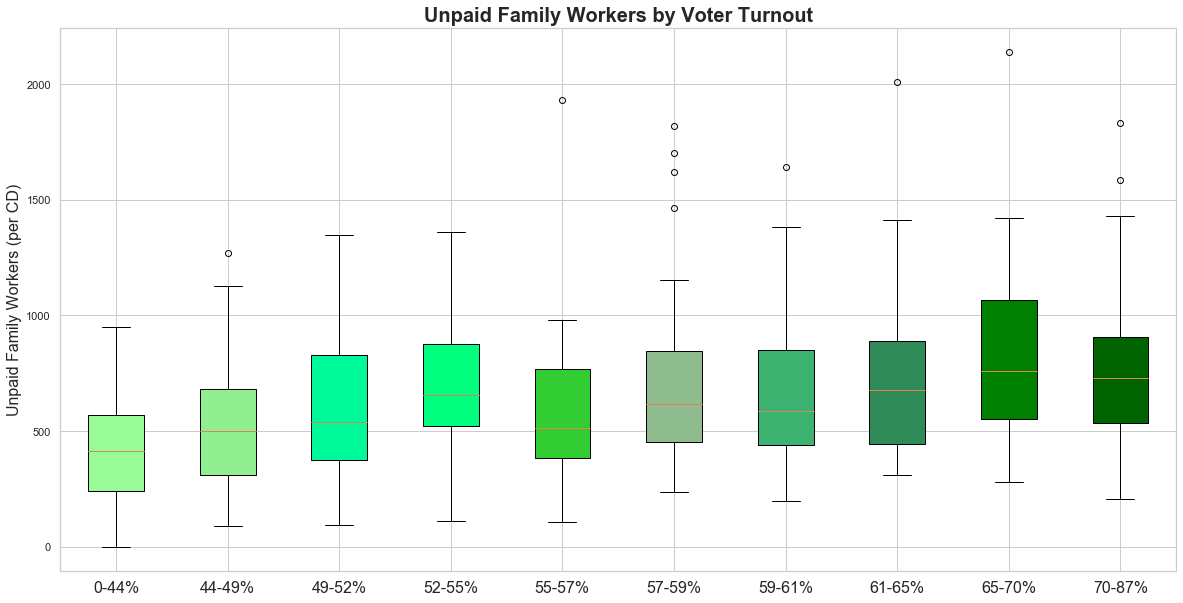

In [18]:
##############################

# 115 - EMPLOYED
group1_employed = voter_group[115].iloc[group1]
group2_employed = voter_group[115].iloc[group2]
group3_employed = voter_group[115].iloc[group3]
group4_employed = voter_group[115].iloc[group4]
group5_employed = voter_group[115].iloc[group5]
group6_employed = voter_group[115].iloc[group6]
group7_employed = voter_group[115].iloc[group7]
group8_employed = voter_group[115].iloc[group8]
group9_employed = voter_group[115].iloc[group9]
group10_employed = voter_group[115].iloc[group10]

plot_4_list = [group1_employed, group2_employed, group3_employed,group4_employed,group5_employed,group6_employed,
               group7_employed,group8_employed,group9_employed,group10_employed]

f, ax = plt.subplots(figsize=(20,10))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xticks(fontsize=16)
plt.ylabel('Employed Adults (per CD)', fontsize=16)
colors = ['palegreen', 'lightgreen', 'mediumspringgreen', 'springgreen', 'limegreen', 'darkseagreen', 'mediumseagreen', 'seagreen', 'green', 'darkgreen']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Employment by Voter Turnout', fontsize=20, fontweight='bold')
plt.show()

##############################

# 116 - UNEMPLOYED
group1_employed = voter_group[116].iloc[group1]
group2_employed = voter_group[116].iloc[group2]
group3_employed = voter_group[116].iloc[group3]
group4_employed = voter_group[116].iloc[group4]
group5_employed = voter_group[116].iloc[group5]
group6_employed = voter_group[116].iloc[group6]
group7_employed = voter_group[116].iloc[group7]
group8_employed = voter_group[116].iloc[group8]
group9_employed = voter_group[116].iloc[group9]
group10_employed = voter_group[116].iloc[group10]

plot_4_list = [group1_employed, group2_employed, group3_employed,group4_employed,group5_employed,group6_employed,
               group7_employed,group8_employed,group9_employed,group10_employed]

f, ax = plt.subplots(figsize=(20,10))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xticks(fontsize=16)
plt.ylabel('Unemployed Adults (per CD)', fontsize=16)
colors = ['palegreen', 'lightgreen', 'mediumspringgreen', 'springgreen', 'limegreen', 'darkseagreen', 'mediumseagreen', 'seagreen', 'green', 'darkgreen']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Unemployment by Voter Turnout', fontsize=20, fontweight='bold')
plt.show()

##############################

# 118 - ELIGIBLE WORKERS NOT IN THE LABOR FORCE
group1_employed = voter_group[118].iloc[group1]
group2_employed = voter_group[118].iloc[group2]
group3_employed = voter_group[118].iloc[group3]
group4_employed = voter_group[118].iloc[group4]
group5_employed = voter_group[118].iloc[group5]
group6_employed = voter_group[118].iloc[group6]
group7_employed = voter_group[118].iloc[group7]
group8_employed = voter_group[118].iloc[group8]
group9_employed = voter_group[118].iloc[group9]
group10_employed = voter_group[118].iloc[group10]

plot_4_list = [group1_employed, group2_employed, group3_employed,group4_employed,group5_employed,group6_employed,
               group7_employed,group8_employed,group9_employed,group10_employed]

f, ax = plt.subplots(figsize=(20,10))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xticks(fontsize=16)
plt.ylabel('Workers Out of Labor Force (per CD)', fontsize=16)
colors = ['palegreen', 'lightgreen', 'mediumspringgreen', 'springgreen', 'limegreen', 'darkseagreen', 'mediumseagreen', 'seagreen', 'green', 'darkgreen']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Workers Not in the Labor Force by Voter Turnout', fontsize=20, fontweight='bold')
plt.show()

##############################

# 153 - UNPAID FAMILY WORKERS
group1_employed = voter_group[153].iloc[group1]
group2_employed = voter_group[153].iloc[group2]
group3_employed = voter_group[153].iloc[group3]
group4_employed = voter_group[153].iloc[group4]
group5_employed = voter_group[153].iloc[group5]
group6_employed = voter_group[153].iloc[group6]
group7_employed = voter_group[153].iloc[group7]
group8_employed = voter_group[153].iloc[group8]
group9_employed = voter_group[153].iloc[group9]
group10_employed = voter_group[153].iloc[group10]

plot_4_list = [group1_employed, group2_employed, group3_employed,group4_employed,group5_employed,group6_employed,
               group7_employed,group8_employed,group9_employed,group10_employed]

f, ax = plt.subplots(figsize=(20,10))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xticks(fontsize=16)
plt.ylabel('Unpaid Family Workers (per CD)', fontsize=16)
colors = ['palegreen', 'lightgreen', 'mediumspringgreen', 'springgreen', 'limegreen', 'darkseagreen', 'mediumseagreen', 'seagreen', 'green', 'darkgreen']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Unpaid Family Workers by Voter Turnout', fontsize=20, fontweight='bold')
plt.show()

##############################

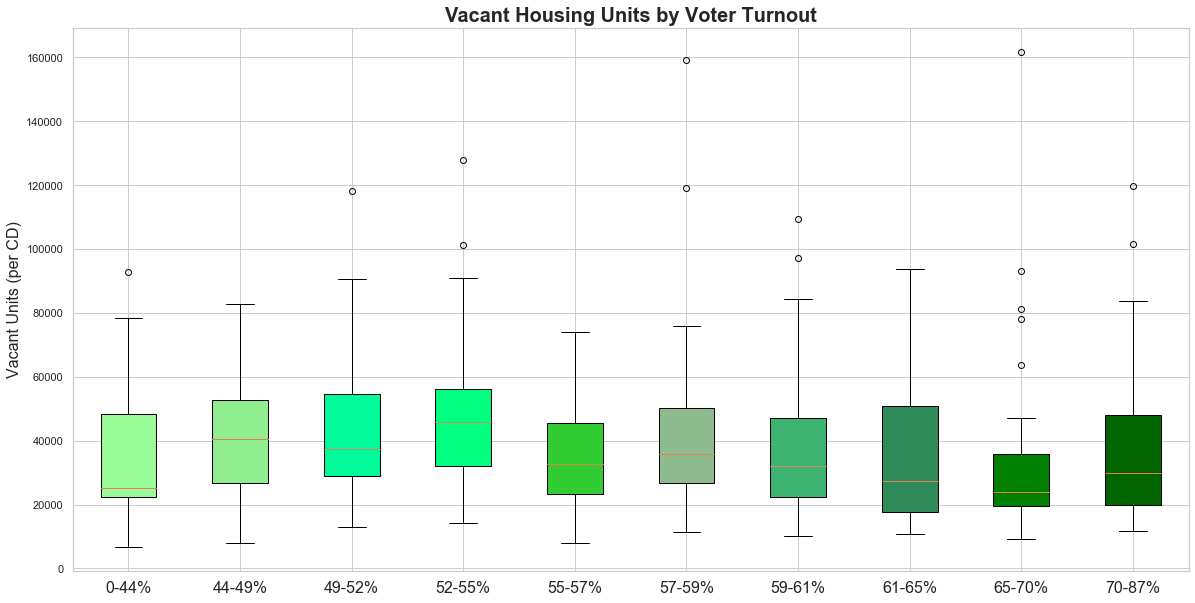

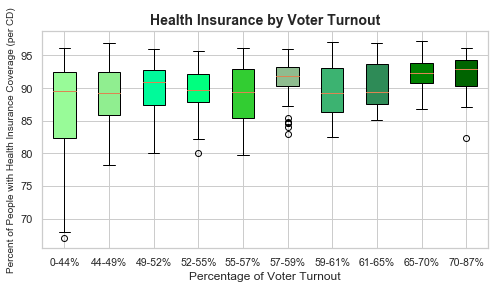

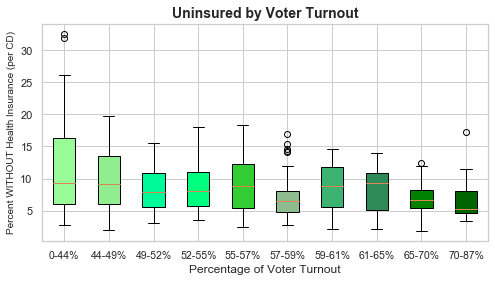

In [19]:
##############################

# 156 - VACANT HOUSING UNITS
group1_employed = voter_group[156].iloc[group1]
group2_employed = voter_group[156].iloc[group2]
group3_employed = voter_group[156].iloc[group3]
group4_employed = voter_group[156].iloc[group4]
group5_employed = voter_group[156].iloc[group5]
group6_employed = voter_group[156].iloc[group6]
group7_employed = voter_group[156].iloc[group7]
group8_employed = voter_group[156].iloc[group8]
group9_employed = voter_group[156].iloc[group9]
group10_employed = voter_group[156].iloc[group10]

plot_4_list = [group1_employed, group2_employed, group3_employed,group4_employed,group5_employed,group6_employed,
               group7_employed,group8_employed,group9_employed,group10_employed]

f, ax = plt.subplots(figsize=(20,10))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xticks(fontsize=16)
plt.ylabel('Vacant Units (per CD)', fontsize=16)
colors = ['palegreen', 'lightgreen', 'mediumspringgreen', 'springgreen', 'limegreen', 'darkseagreen', 'mediumseagreen', 'seagreen', 'green', 'darkgreen']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Vacant Housing Units by Voter Turnout', fontsize=20, fontweight='bold')
plt.show()

##############################

# 225 - WITH HEALTH INSURANCE COVERAGE
group1_employed = (voter_group[225].iloc[group1]/voter_group[25].iloc[group1])*100
group2_employed = (voter_group[225].iloc[group2]/voter_group[25].iloc[group2])*100
group3_employed = (voter_group[225].iloc[group3]/voter_group[25].iloc[group3])*100
group4_employed = (voter_group[225].iloc[group4]/voter_group[25].iloc[group4])*100
group5_employed = (voter_group[225].iloc[group5]/voter_group[25].iloc[group5])*100
group6_employed = (voter_group[225].iloc[group6]/voter_group[25].iloc[group6])*100
group7_employed = (voter_group[225].iloc[group7]/voter_group[25].iloc[group7])*100
group8_employed = (voter_group[225].iloc[group8]/voter_group[25].iloc[group8])*100
group9_employed = (voter_group[225].iloc[group9]/voter_group[25].iloc[group9])*100
group10_employed = (voter_group[225].iloc[group10]/voter_group[25].iloc[group10])*100

plot_4_list = [group1_employed, group2_employed, group3_employed,group4_employed,group5_employed,group6_employed,
               group7_employed,group8_employed,group9_employed,group10_employed]

f, ax = plt.subplots(figsize=(8,4))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xlabel("Percentage of Voter Turnout", fontsize=12)
plt.xticks(fontsize=10.5)
plt.ylabel('Percent of People with Health Insurance Coverage (per CD)', fontsize=10)
colors = ['palegreen', 'lightgreen', 'mediumspringgreen', 'springgreen', 'limegreen', 'darkseagreen', 'mediumseagreen', 'seagreen', 'green', 'darkgreen']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Health Insurance by Voter Turnout', fontsize=14, fontweight='bold')
plt.show()

##############################

# 228 - WITHOUT HEALTH INSURANCE COVERAGE
group1_employed = (voter_group[228].iloc[group1]/voter_group[25].iloc[group1])*100
group2_employed = (voter_group[228].iloc[group2]/voter_group[25].iloc[group2])*100
group3_employed = (voter_group[228].iloc[group3]/voter_group[25].iloc[group3])*100
group4_employed = (voter_group[228].iloc[group4]/voter_group[25].iloc[group4])*100
group5_employed = (voter_group[228].iloc[group5]/voter_group[25].iloc[group5])*100
group6_employed = (voter_group[228].iloc[group6]/voter_group[25].iloc[group6])*100
group7_employed = (voter_group[228].iloc[group7]/voter_group[25].iloc[group7])*100
group8_employed = (voter_group[228].iloc[group8]/voter_group[25].iloc[group8])*100
group9_employed = (voter_group[228].iloc[group9]/voter_group[25].iloc[group9])*100
group10_employed = (voter_group[228].iloc[group10]/voter_group[25].iloc[group10])*100

plot_4_list = [group1_employed, group2_employed, group3_employed,group4_employed,group5_employed,group6_employed,
               group7_employed,group8_employed,group9_employed,group10_employed]

f, ax = plt.subplots(figsize=(8,4))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xticks(fontsize=10.5)
plt.xlabel("Percentage of Voter Turnout", fontsize=12)
plt.ylabel('Percent WITHOUT Health Insurance (per CD)', fontsize=10)
colors = ['palegreen', 'lightgreen', 'mediumspringgreen', 'springgreen', 'limegreen', 'darkseagreen', 'mediumseagreen', 'seagreen', 'green', 'darkgreen']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Uninsured by Voter Turnout', fontsize=14, fontweight='bold')
plt.show()

##############################

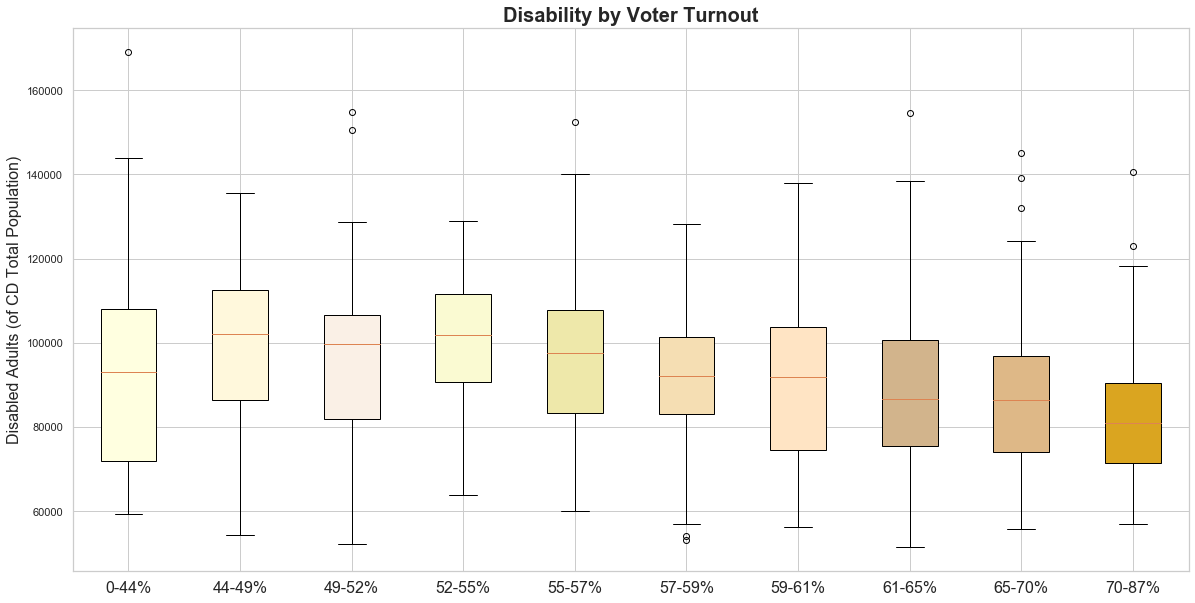

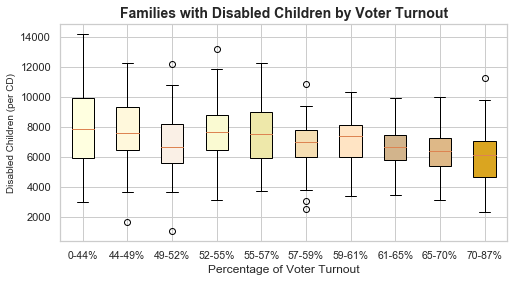

In [20]:
##############################

# 97 - DISABLED PERSONS
group1_employed = voter_group[97].iloc[group1]
group2_employed = voter_group[97].iloc[group2]
group3_employed = voter_group[97].iloc[group3]
group4_employed = voter_group[97].iloc[group4]
group5_employed = voter_group[97].iloc[group5]
group6_employed = voter_group[97].iloc[group6]
group7_employed = voter_group[97].iloc[group7]
group8_employed = voter_group[97].iloc[group8]
group9_employed = voter_group[97].iloc[group9]
group10_employed = voter_group[97].iloc[group10]

plot_4_list = [group1_employed, group2_employed, group3_employed,group4_employed,group5_employed,group6_employed,
               group7_employed,group8_employed,group9_employed,group10_employed]

f, ax = plt.subplots(figsize=(20,10))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xticks(fontsize=16)
plt.ylabel('Disabled Adults (of CD Total Population)', fontsize=16)
colors = ['lightyellow', 'cornsilk', 'linen', 'lightgoldenrodyellow', 'palegoldenrod', 'wheat', 'bisque', 'tan', 'burlywood', 'goldenrod']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Disability by Voter Turnout', fontsize=20, fontweight='bold')
plt.show()

##############################

# 99 - DISABLED CHILDREN
group1_employed = voter_group[99].iloc[group1]
group2_employed = voter_group[99].iloc[group2]
group3_employed = voter_group[99].iloc[group3]
group4_employed = voter_group[99].iloc[group4]
group5_employed = voter_group[99].iloc[group5]
group6_employed = voter_group[99].iloc[group6]
group7_employed = voter_group[99].iloc[group7]
group8_employed = voter_group[99].iloc[group8]
group9_employed = voter_group[99].iloc[group9]
group10_employed = voter_group[99].iloc[group10]

plot_4_list = [group1_employed, group2_employed, group3_employed,group4_employed,group5_employed,group6_employed,
               group7_employed,group8_employed,group9_employed,group10_employed]

f, ax = plt.subplots(figsize=(8,4))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xticks(fontsize=10.5)
plt.xlabel("Percentage of Voter Turnout", fontsize=12)
plt.ylabel('Disabled Children (per CD)', fontsize=10)
colors = ['lightyellow', 'cornsilk', 'linen', 'lightgoldenrodyellow', 'palegoldenrod', 'wheat', 'bisque', 'tan', 'burlywood', 'goldenrod']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Families with Disabled Children by Voter Turnout', fontsize=14, fontweight='bold')
plt.show()

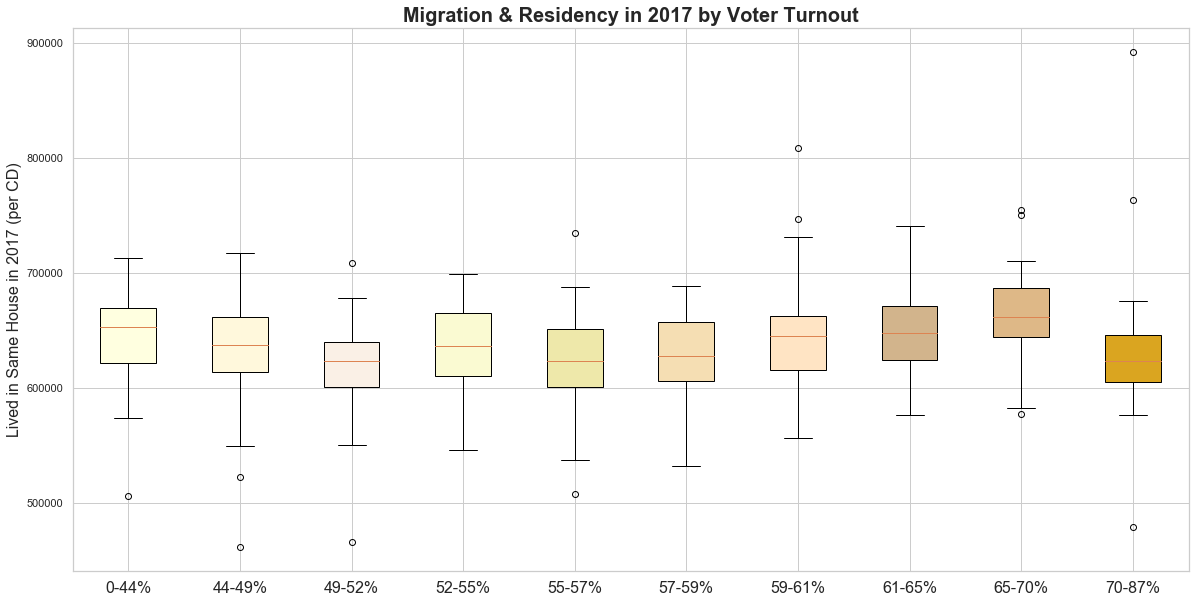

In [21]:
##############################

# 105 - LIVED IN SAME HOUSE IN 2017
group1_employed = voter_group[105].iloc[group1]
group2_employed = voter_group[105].iloc[group2]
group3_employed = voter_group[105].iloc[group3]
group4_employed = voter_group[105].iloc[group4]
group5_employed = voter_group[105].iloc[group5]
group6_employed = voter_group[105].iloc[group6]
group7_employed = voter_group[105].iloc[group7]
group8_employed = voter_group[105].iloc[group8]
group9_employed = voter_group[105].iloc[group9]
group10_employed = voter_group[105].iloc[group10]

plot_4_list = [group1_employed, group2_employed, group3_employed,group4_employed,group5_employed,group6_employed,
               group7_employed,group8_employed,group9_employed,group10_employed]

f, ax = plt.subplots(figsize=(20,10))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xticks(fontsize=16)
plt.ylabel('Lived in Same House in 2017 (per CD)', fontsize=16)
colors = ['lightyellow', 'cornsilk', 'linen', 'lightgoldenrodyellow', 'palegoldenrod', 'wheat', 'bisque', 'tan', 'burlywood', 'goldenrod']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Migration & Residency in 2017 by Voter Turnout', fontsize=20, fontweight='bold')
plt.show()

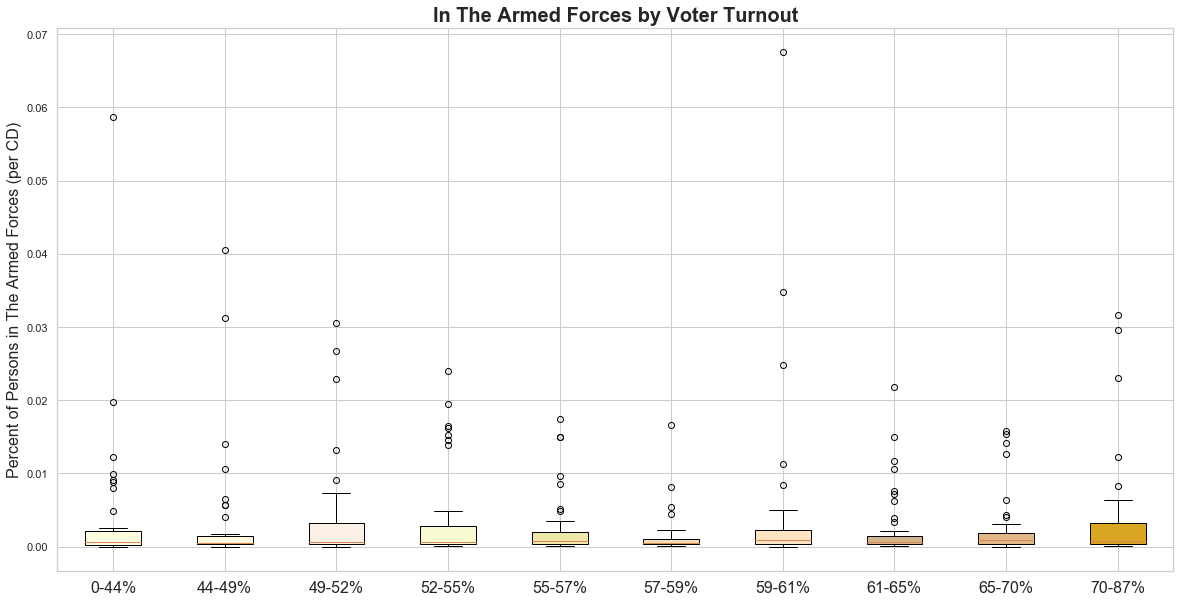

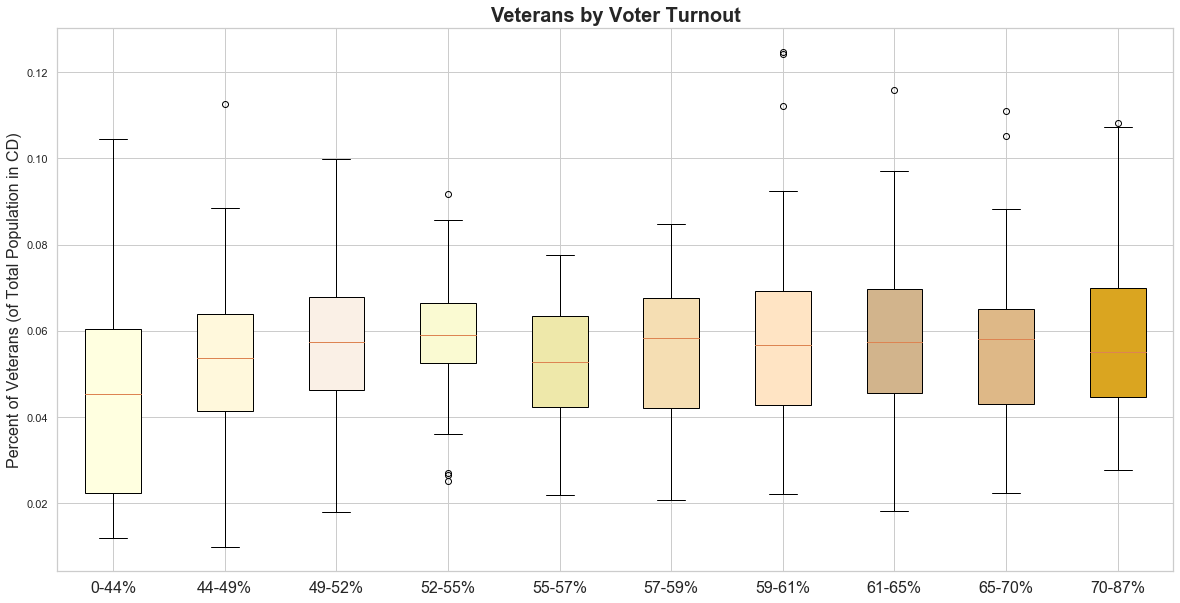

In [22]:
##############################

# 117 - IN THE MILITARY
group1_employed = voter_group[117].iloc[group1]/voter_group[25].iloc[group1]
group2_employed = voter_group[117].iloc[group2]/voter_group[25].iloc[group2]
group3_employed = voter_group[117].iloc[group3]/voter_group[25].iloc[group3]
group4_employed = voter_group[117].iloc[group4]/voter_group[25].iloc[group4]
group5_employed = voter_group[117].iloc[group5]/voter_group[25].iloc[group5]
group6_employed = voter_group[117].iloc[group6]/voter_group[25].iloc[group6]
group7_employed = voter_group[117].iloc[group7]/voter_group[25].iloc[group7]
group8_employed = voter_group[117].iloc[group8]/voter_group[25].iloc[group8]
group9_employed = voter_group[117].iloc[group9]/voter_group[25].iloc[group9]
group10_employed = voter_group[117].iloc[group10]/voter_group[25].iloc[group10]

plot_4_list = [group1_employed, group2_employed, group3_employed,group4_employed,group5_employed,group6_employed,
               group7_employed,group8_employed,group9_employed,group10_employed]

f, ax = plt.subplots(figsize=(20,10))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xticks(fontsize=16)
plt.ylabel('Percent of Persons in The Armed Forces (per CD)', fontsize=16)
colors = ['lightyellow', 'cornsilk', 'linen', 'lightgoldenrodyellow', 'palegoldenrod', 'wheat', 'bisque', 'tan', 'burlywood', 'goldenrod']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('In The Armed Forces by Voter Turnout', fontsize=20, fontweight='bold')
plt.show()

##############################

# 95 - VETERANS
group1_employed = voter_group[95].iloc[group1]/voter_group[25].iloc[group1]
group2_employed = voter_group[95].iloc[group2]/voter_group[25].iloc[group2]
group3_employed = voter_group[95].iloc[group3]/voter_group[25].iloc[group3]
group4_employed = voter_group[95].iloc[group4]/voter_group[25].iloc[group4]
group5_employed = voter_group[95].iloc[group5]/voter_group[25].iloc[group5]
group6_employed = voter_group[95].iloc[group6]/voter_group[25].iloc[group6]
group7_employed = voter_group[95].iloc[group7]/voter_group[25].iloc[group7]
group8_employed = voter_group[95].iloc[group8]/voter_group[25].iloc[group8]
group9_employed = voter_group[95].iloc[group9]/voter_group[25].iloc[group9]
group10_employed = voter_group[95].iloc[group10]/voter_group[25].iloc[group10]

plot_4_list = [group1_employed, group2_employed, group3_employed,group4_employed,group5_employed,group6_employed,
               group7_employed,group8_employed,group9_employed,group10_employed]

f, ax = plt.subplots(figsize=(20,10))
box_plot_data=plot_4_list
boxes=plt.boxplot(box_plot_data,patch_artist=True, labels=[label1,label2,label3,label4,label5,label6,label7,label8,label9,label10])
plt.xticks(fontsize=16)
plt.ylabel('Percent of Veterans (of Total Population in CD)', fontsize=16)
colors = ['lightyellow', 'cornsilk', 'linen', 'lightgoldenrodyellow', 'palegoldenrod', 'wheat', 'bisque', 'tan', 'burlywood', 'goldenrod']
for patch, color in zip(boxes['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Veterans by Voter Turnout', fontsize=20, fontweight='bold')
plt.show()